<a href="https://colab.research.google.com/github/ssjiyobindas/Regression-Models-in-Python-for-House-Price-Prediction/blob/main/Regression_Models_in_Python_for_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from time import time
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neural_network import MLPRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split,GridSearchCV,LeaveOneOut
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
sns.set(font_scale=1.5)

pd.options.display.max_columns=200
pd.options.display.max_rows=1000
pd.options.display.max_colwidth = None

In [ ]:
dfr = pd.read_excel("Real_Estate Data.xlsx")

In [ ]:
#preliminary exploration
dfr.shape

(200, 17)

In [ ]:
dfr.head()

Sr. No.                  Location   Sub-Area Propert Type  \
0        1  Pune, Maharashtra, India    Bavdhan        1 BHK   
1        2  Pune, Maharashtra, India    Bavdhan        2 BHK   
2        3  Pune, Maharashtra, India    Bavdhan        3 BHK   
3        4  Pune, Maharashtra, India    Bavdhan  3 BHK Grand   
4        5  Pune, Maharashtra, India  Mahalunge         2BHK   

  Property Area in Sq. Ft. Price in lakhs  Price in Millions  \
0                      492             39                3.9   
1                      774             65                6.5   
2                      889             74                7.4   
3                     1018             89                8.9   
4                      743             74                7.4   

         Company Name TownShip Name/ Society Name  \
0  Shapoorji Paloonji                     Vanaha    
1  Shapoorji Paloonji                     Vanaha    
2  Shapoorji Paloonji                     Vanaha    
3  Shapoorji Paloonji                     Vanaha    
4   Godrej Properties        Godrej Hills retreat   

   Total TownShip Area in Acres ClubHouse School / University in Township   \
0                        1000.0       Yes                              Yes   
1                        1000.0       Yes                              Yes   
2                        1000.0       Yes                              Yes   
3                        1000.0       Yes                              Yes   
4                         100.0       Yes                              Yes   

  Hospital in TownShip Mall in TownShip Park / Jogging track Swimming Pool  \
0                  Yes              Yes                  Yes           Yes   
1                  Yes              Yes                  Yes           Yes   
2                  Yes              Yes                  Yes           Yes   
3                  Yes              Yes                  Yes           Yes   
4                  Yes              Yes                  Yes           Yes   

   Gym  
0  Yes  
1  Yes  
2  Yes  
3  Yes  
4  Yes

In [ ]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [ ]:
dfr.rename(columns={"Propert Type":"Property Type"}, inplace=True)

Cleaning the property's characteristics

In [ ]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Property Type                     200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [ ]:
dfr["Property Type"].unique()

array(['1 BHK', '2 BHK', '3 BHK', '3 BHK Grand', '2BHK', '3BHK', '4BHK',
       '5BHK', '6BHK', '1BHK', 'shop', '2 bhk', '2bhk ', '3  bhk ',
       '3 bhk', '2bhk', '2.5 BHK', '3 BHK ', '4 bhk', '1 bhk', '2.5 bhk',
       '1bhk', '3bhk', '3.5bhk', '3.5 bhk', '3bhk ', '2+2 bhk', '3+2bhk ',
       '2 bhk ', '5 bhk', '1bhk ', '4.5bhk', '4bhk'], dtype=object)

In [ ]:
dfr = dfr[ dfr["Property Type"]!="shop" ]
dfr.shape

(199, 17)

In [ ]:
dfr["Property Area in Sq. Ft."].unique()

array([492, 774, 889, 1018, 743, 975, '877 to 912', '1077 to 1272', 905,
       1125, 1644, 2220, '662 to 845', '890 to 1212', 423, 665,
       '792 to 965', 462, 666, 750, 1030, 446, 796, 842, 865, 902, 1154,
       872, 934, 1088, 1109, 1163, 1419, 1485, 684, 990, 882, 1103, 543,
       '801 to 1125', '1272 to 2138', 320, 473, 581, 790, 820, 989, 1003,
       1182, 1579, 491, 659, 732, 809, 460, 734, 753, 675, 917, 670, 740,
       847, 936, 1032, 1698, 2267, 725, 731, 744, 923, 930, 792, 1180,
       860, 988, 1093, 456, 644, 785, 1060, 113, 664, 673, 682, 698, 1239,
       1315, 1388, 1463, 1671, 1687, 575, 751, 761, 871, 1166, 1206, 1272,
       1279, 646, 717, 436, 637, 642, 655, 668, 810, 735, 783, 805, 1074,
       1111, 535, 947, 697, 711, 980, 1400, 1772, 1662, 705, 726, 793,
       904, 1168, 1189, 479, 693, 808, 1086, 844, 873, 606, 611, 626, 691,
       835, 854, 715, '624 to 761', 968, 996, 1038, 489, 598, 616, 692,
       867, 908, 1624, 2043, 727, '561 to 902', '1056 to

In [ ]:
def splitSum(e,flag=True) :
  """
  Gives the total number of bedrooms/ property area param:
  e: string, either the number of rooms or property area
  flag : boolean, True : number of bedrooms, False: property area
  return:
  float, number of bedrooms/ Property Area
  """
  try:
      e = str(e).lower() #convert to lower case
      e = re.sub(r"[,.;@#?!$+]+\ *"," ",e) #remove all alphanumerical characters
      e = re.sub(r"[a-z]+"," ", e) # remove the letters
      e = re.sub(r"\s\s","",e) # double spaces are removed

      #remaining entry should be a number or two numbers separated by a space.

      s2list = e.strip().split() #the entry is then transformed to a list by spliting it wrt space as a separator

      sumList = sum(float(e) for e in s2list) # sum over the s2list variable

      #computing the mean value for property area that look like '1101 to 1113'
      e_norm = sumList if flag else sumList/len(s2list)
      return e_norm
  except:
    return np.nan

def normaliseProps(df):
  """
  Extracts the number of rooms from 'Property Type' columns  and mean values  for "Property Area in Sq.Ft."
  Params:
    data: Pandas dataframe, the input data
  Returns:
    Pandas dataframe
  """
  data = df.copy()
  data["Property Type"] = data ["Property Type"].apply(splitSum)
  data["Property Area in Sq. Ft."] = \
    data["Property Area in Sq. Ft."]\
          .apply(lambda x : splitSum(x,False))
  return data

In [ ]:
df_norm = normaliseProps(dfr)

In [ ]:
df_norm["Property Type"].unique()

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
df_norm["Property Area in Sq. Ft."].unique()

array([ 492. ,  774. ,  889. , 1018. ,  743. ,  975. ,  894.5, 1174.5,
        905. , 1125. , 1644. , 2220. ,  753.5, 1051. ,  423. ,  665. ,
        878.5,  462. ,  666. ,  750. , 1030. ,  446. ,  796. ,  842. ,
        865. ,  902. , 1154. ,  872. ,  934. , 1088. , 1109. , 1163. ,
       1419. , 1485. ,  684. ,  990. ,  882. , 1103. ,  543. ,  963. ,
       1705. ,  320. ,  473. ,  581. ,  790. ,  820. ,  989. , 1003. ,
       1182. , 1579. ,  491. ,  659. ,  732. ,  809. ,  460. ,  734. ,
        753. ,  675. ,  917. ,  670. ,  740. ,  847. ,  936. , 1032. ,
       1698. , 2267. ,  725. ,  731. ,  744. ,  923. ,  930. ,  792. ,
       1180. ,  860. ,  988. , 1093. ,  456. ,  644. ,  785. , 1060. ,
        113. ,  664. ,  673. ,  682. ,  698. , 1239. , 1315. , 1388. ,
       1463. , 1671. , 1687. ,  575. ,  751. ,  761. ,  871. , 1166. ,
       1206. , 1272. , 1279. ,  646. ,  717. ,  436. ,  637. ,  642. ,
        655. ,  668. ,  810. ,  735. ,  783. ,  805. , 1074. , 1111. ,
      

In [ ]:
df_norm.dtypes

Sr. No.                               int64
Location                             object
Sub-Area                             object
Property Type                       float64
Property Area in Sq. Ft.            float64
Price in lakhs                       object
Price in Millions                   float64
Company Name                         object
TownShip Name/ Society Name          object
Total TownShip Area in Acres        float64
ClubHouse                            object
School / University in Township      object
Hospital in TownShip                 object
Mall in TownShip                     object
Park / Jogging track                 object
Swimming Pool                        object
Gym                                  object
dtype: object

Cleaning the outliers

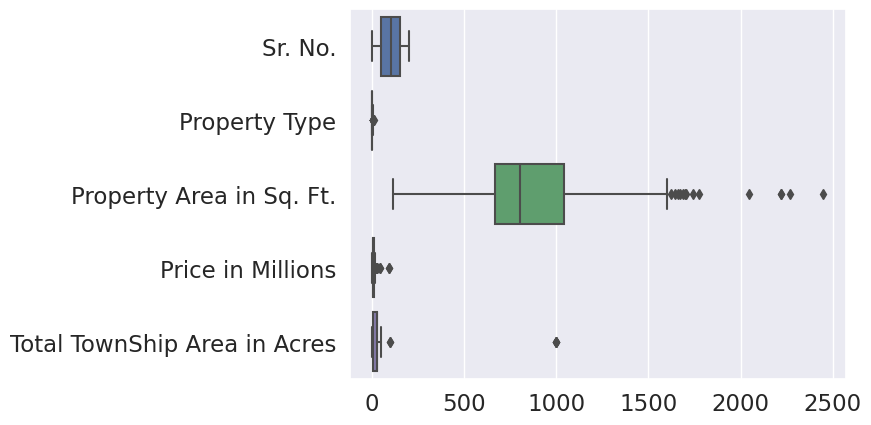

In [ ]:
sns.boxplot(data=df_norm, orient="h")
plt.show()

In [ ]:
def computeUpperFence(df_col,up=True):
  """
  Computes the upper/lower fence for a given  colummn.
  Params:
    df_col: Pandas series, dataframe column
    up: boolena, True for upper fence, False for lower fence
  Return:
    upper/lower fence value : float
  """
  iqr = df_col.quantile(.75) - df_col.quantile(.25) #inter quartile range
  if up:
    return df_col.quantile(.75)+ iqr*1.5
  return df_col.quantile(.25) - iqr*1.5


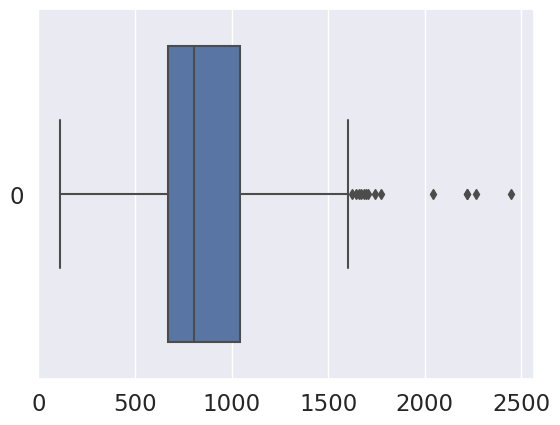

In [ ]:
# Lookinf for outliers
sns.boxplot(data=df_norm['Property Area in Sq. Ft.'], orient="h")
plt.show()

In [ ]:
# checking the outliers for Property Area in  Sq. Ft.
x_pa = df_norm['Property Area in Sq. Ft.']
pa_up_lim = computeUpperFence(x_pa)
df_norm[ x_pa>pa_up_lim]

#They are atypical not outliers. They have many rooms.

Sr. No.                  Location      Sub-Area  Property Type  \
10        11  Pune, Maharashtra, India         Ravet            4.0   
11        12  Pune, Maharashtra, India         Ravet            5.0   
12        13  Pune, Maharashtra, India         Ravet            6.0   
41        42  Pune, Maharashtra, India  Keshav Nagar            3.0   
67        68  Pune, Maharashtra, India  kayani nagar            3.0   
68        69  Pune, Maharashtra, India  kayani nagar            4.0   
96        97  Pune, Maharashtra, India          NIBM            8.0   
97        98  Pune, Maharashtra, India          NIBM            8.0   
128      129  Pune, Maharashtra, India    Hinjewadi             5.0   
131      132  Pune, Maharashtra, India      hadapsar            5.0   
167      168  Pune, Maharashtra, India      lonavala            3.0   
168      169  Pune, Maharashtra, India      lonavala            4.0   
183      184  Pune, Maharashtra, India         baner            8.0   
184      185  Pune, Maharashtra, India         baner            9.0   

     Property Area in Sq. Ft. Price in lakhs  Price in Millions  \
10                     1644.0            135               13.5   
11                     2220.0            188               18.8   
12                     2220.0            188               18.8   
41                     1705.0           Null                NaN   
67                     1698.0            249               24.9   
68                     2267.0            460               46.0   
96                     1671.0            211               21.1   
97                     1687.0            213               21.3   
128                    1772.0            177               17.7   
131                    1662.0            130               13.0   
167                    1624.0            159               15.9   
168                    2043.0            215               21.5   
183                    1740.0            250               25.0   
184                    2447.0            420               42.0   

                 Company Name TownShip Name/ Society Name  \
10        Urban Space Creator               Urban Skyline   
11        Urban Space Creator               Urban Skyline   
12        Urban Space Creator               Urban Skyline   
41          Mantra Properties             Mantra Insignia   
67   sagitarius ecospaces llp        bluegrass residences   
68   sagitarius ecospaces llp        bluegrass residences   
96              kundan Spaces                   Presidia    
97              kundan Spaces                   Presidia    
128        Shapoorji Paloonji                  Sensorium    
131    Wellwisher Apartments               kiarah terrazo   
167                  Puraniks             puraniks Sayama   
168                  Puraniks             puraniks Sayama   
183                 Kalpataru            jade residences    
184                 Kalpataru            jade residences    

     Total TownShip Area in Acres ClubHouse School / University in Township   \
10                           10.0       Yes                               No   
11                           10.0       Yes                               No   
12                           10.0       Yes                               No   
41                            NaN       Yes                               No   
67                            NaN       yes                               no   
68                            NaN       yes                               no   
96                            NaN       yes                               no   
97                            NaN       yes                               no   
128                           NaN       yes                               no   
131                           NaN        no                               no   
167                           NaN       yes                               no   
168                           NaN       yes              

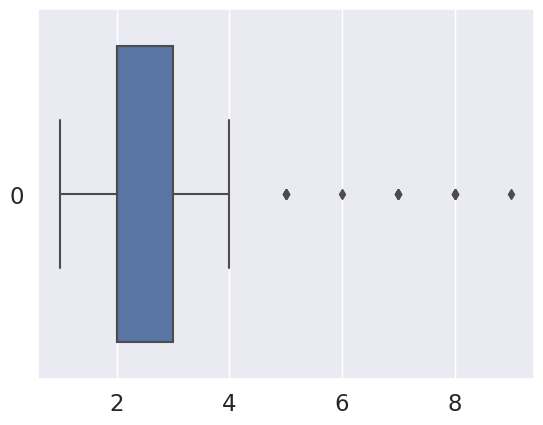

In [ ]:
#Looking for outliers
sns.boxplot(data=df_norm["Property Type"],orient="h")
plt.show()

In [ ]:
#checking the outliers for the property type
x_prt= df_norm['Property Type']
prt_up_lim= computeUpperFence(x_prt)
df_norm[x_prt>prt_up_lim]

Sr. No.                  Location    Sub-Area  Property Type  \
11        12  Pune, Maharashtra, India       Ravet            5.0   
12        13  Pune, Maharashtra, India       Ravet            6.0   
50        51  Pune, Maharashtra, India      Akurdi            5.0   
63        64  Pune, Maharashtra, India      kiwale            7.0   
64        65  Pune, Maharashtra, India      kiwale            7.0   
77        78  Pune, Maharashtra, India     manjri             7.0   
84        85  Pune, Maharashtra, India   handewadi            7.0   
86        87  Pune, Maharashtra, India    koregoan            8.0   
96        97  Pune, Maharashtra, India        NIBM            8.0   
97        98  Pune, Maharashtra, India        NIBM            8.0   
128      129  Pune, Maharashtra, India  Hinjewadi             5.0   
131      132  Pune, Maharashtra, India    hadapsar            5.0   
183      184  Pune, Maharashtra, India       baner            8.0   
184      185  Pune, Maharashtra, India       baner            9.0   

     Property Area in Sq. Ft. Price in lakhs  Price in Millions  \
11                     2220.0            188             18.800   
12                     2220.0            188             18.800   
50                     1579.0            163             16.300   
63                      847.0          69.38              6.938   
64                      936.0          75.03              7.503   
77                      792.0           65.5              6.550   
84                      785.0          55.22              5.522   
86                      113.0            143             14.300   
96                     1671.0            211             21.100   
97                     1687.0            213             21.300   
128                    1772.0            177             17.700   
131                    1662.0            130             13.000   
183                    1740.0            250             25.000   
184                    2447.0            420             42.000   

               Company Name TownShip Name/ Society Name  \
11      Urban Space Creator               Urban Skyline   
12      Urban Space Creator               Urban Skyline   
50        Mantra Properties            Mantra Sky Tower   
63        unique properties                     k ville   
64        unique properties                     k ville   
77              jhala group          tranquility annexe   
84              jhala group                  simplicity   
86       shroff developers                      aureta    
96            kundan Spaces                   Presidia    
97            kundan Spaces                   Presidia    
128      Shapoorji Paloonji                  Sensorium    
131  Wellwisher Apartments               kiarah terrazo   
183               Kalpataru            jade residences    
184               Kalpataru            jade residences    

     Total TownShip Area in Acres ClubHouse School / University in Township   \
11                           10.0       Yes                               No   
12                           10.0       Yes                               No   
50                            3.5       Yes                               No   
63                            NaN       yes                               no   
64                            NaN       yes                               no   
77                            NaN       yes                               no   
84                            NaN       yes                               no   
86                            NaN        no                               no   
96                            NaN       yes                               no   
97                            NaN       yes                               no   
128                           NaN       yes                               no   
131                           NaN        no                               no   
183                           NaN    

In [ ]:
df_norm.drop(index=86, inplace = True)

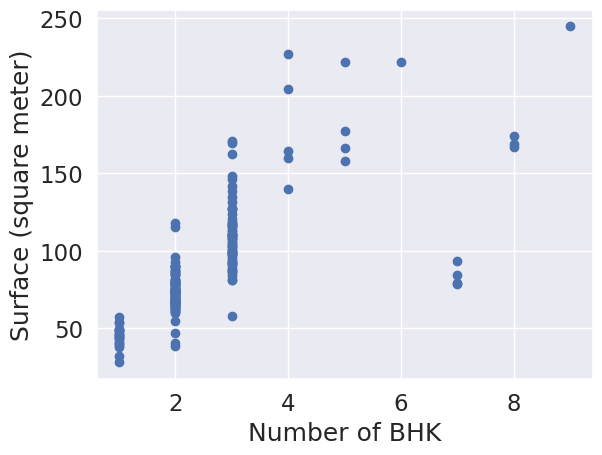

In [ ]:
plt.scatter(df_norm["Property Type"],
            df_norm["Property Area in Sq. Ft."]*.1)
plt.xlabel("Number of BHK")
plt.ylabel("Surface (square meter)")
plt.show()

In [ ]:
#drop the entries that looks like outlier
df_norm.drop(index=df_norm[df_norm["Property Type"]==7].index, inplace=True)
df_norm.shape

(194, 17)

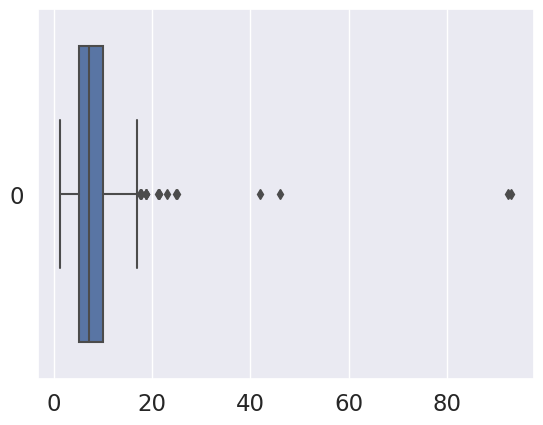

In [ ]:
sns.boxplot(data=df_norm['Price in Millions'],orient='h')
plt.show()


In [ ]:
x_pim=df_norm['Price in Millions']
pim_up_lim=computeUpperFence(x_pim)
df_norm[x_pim>pim_up_lim]


Sr. No.                  Location      Sub-Area  Property Type  \
11        12  Pune, Maharashtra, India         Ravet            5.0   
12        13  Pune, Maharashtra, India         Ravet            6.0   
67        68  Pune, Maharashtra, India  kayani nagar            3.0   
68        69  Pune, Maharashtra, India  kayani nagar            4.0   
73        74  Pune, Maharashtra, India        pisoli            3.0   
74        75  Pune, Maharashtra, India        pisoli            3.0   
94        95  Pune, Maharashtra, India          NIBM            3.0   
95        96  Pune, Maharashtra, India          NIBM            3.0   
96        97  Pune, Maharashtra, India          NIBM            8.0   
97        98  Pune, Maharashtra, India          NIBM            8.0   
128      129  Pune, Maharashtra, India    Hinjewadi             5.0   
168      169  Pune, Maharashtra, India      lonavala            4.0   
182      183  Pune, Maharashtra, India         baner            3.0   
183      184  Pune, Maharashtra, India         baner            8.0   
184      185  Pune, Maharashtra, India         baner            9.0   
196      197  Pune, Maharashtra, India         BANER            4.0   

     Property Area in Sq. Ft. Price in lakhs  Price in Millions  \
11                     2220.0            188               18.8   
12                     2220.0            188               18.8   
67                     1698.0            249               24.9   
68                     2267.0            460               46.0   
73                      923.0            923               92.3   
74                      930.0            930               93.0   
94                     1388.0            178               17.8   
95                     1463.0            187               18.7   
96                     1671.0            211               21.1   
97                     1687.0            213               21.3   
128                    1772.0            177               17.7   
168                    2043.0            215               21.5   
182                    1272.5            175               17.5   
183                    1740.0            250               25.0   
184                    2447.0            420               42.0   
196                    1600.0            230               23.0   

                 Company Name TownShip Name/ Society Name  \
11        Urban Space Creator               Urban Skyline   
12        Urban Space Creator               Urban Skyline   
67   sagitarius ecospaces llp        bluegrass residences   
68   sagitarius ecospaces llp        bluegrass residences   
73          nirman developers         brookefield willows   
74          nirman developers         brookefield willows   
94              kundan Spaces                   Presidia    
95              kundan Spaces                   Presidia    
96              kundan Spaces                   Presidia    
97              kundan Spaces                   Presidia    
128        Shapoorji Paloonji                  Sensorium    
168                  Puraniks             puraniks Sayama   
182                 Kalpataru            jade residences    
183                 Kalpataru            jade residences    
184                 Kalpataru            jade residences    
196                   SUPREME               SUPREME ESTIA   

     Total TownShip Area in Acres ClubHouse School / University in Township   \
11                           10.0       Yes                               No   
12                           10.0       Yes                               No   
67                            NaN       yes                               no   
68                            NaN       yes                               no   
73                            NaN       yes                               no   
74                            NaN       yes                               no   
94                            NaN       yes                

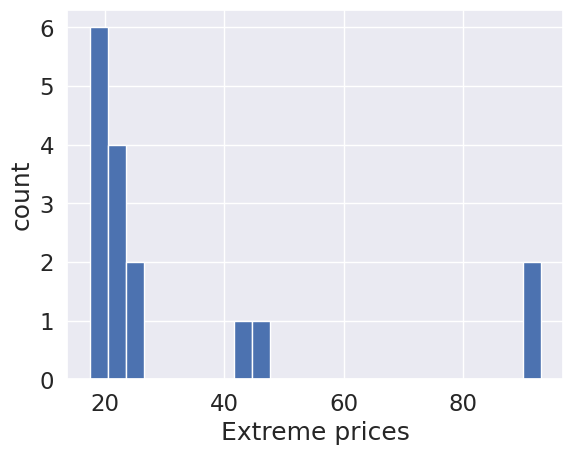

In [ ]:
df_norm[x_pim>pim_up_lim]["Price in Millions"].hist(bins=25)
plt.xlabel("Extreme prices")
plt.ylabel("count")
plt.show()

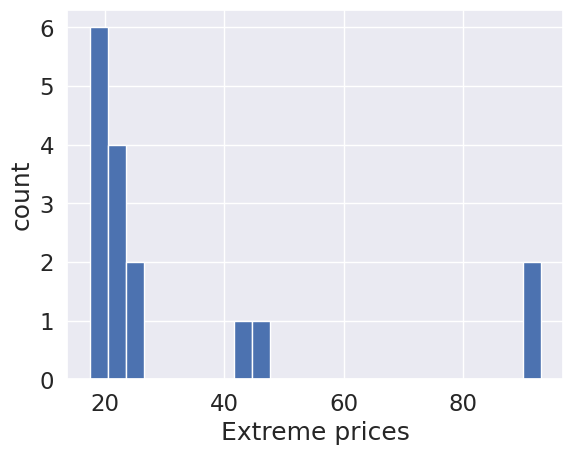

In [ ]:
df_norm[x_pim>pim_up_lim]["Price in Millions"].hist(bins=25)
plt.xlabel("Extreme prices")
plt.ylabel("count")
plt.show()

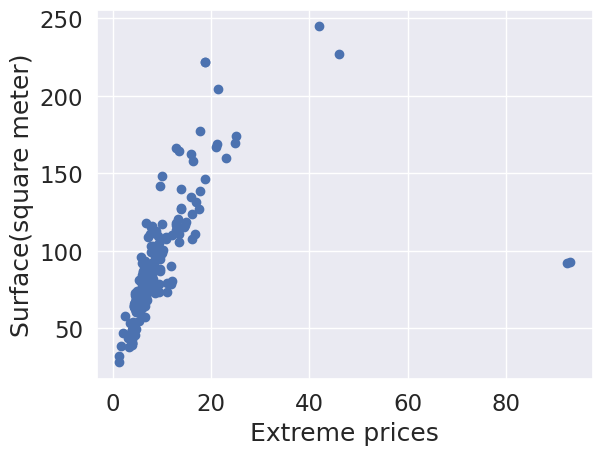

In [ ]:
plt.scatter(df_norm["Price in Millions"],
            df_norm["Property Area in Sq. Ft."]*.1)
plt.xlabel("Extreme prices")
plt.ylabel("Surface(square meter)")
plt.show()

In [ ]:
df_norm = df_norm[df_norm["Price in Millions"]<80]

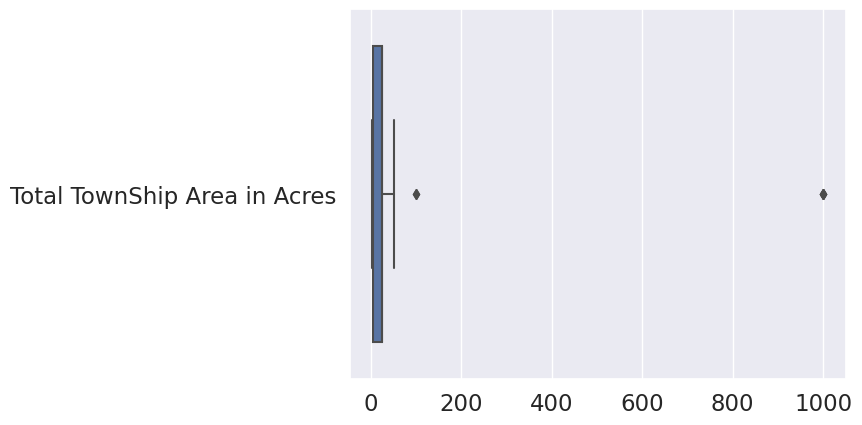

In [ ]:
sns.boxplot(data=df_norm[["Total TownShip Area in Acres"]],orient="h")
plt.show()

In [ ]:
# checking the outliers for total township area in acres
x_tta=df_norm['Total TownShip Area in Acres']
tta_up_lim= computeUpperFence(x_tta)
df_norm[x_tta>tta_up_lim]
#large cities are not outliers

Sr. No.                  Location   Sub-Area  Property Type  \
0        1  Pune, Maharashtra, India    Bavdhan            1.0   
1        2  Pune, Maharashtra, India    Bavdhan            2.0   
2        3  Pune, Maharashtra, India    Bavdhan            3.0   
3        4  Pune, Maharashtra, India    Bavdhan            3.0   
4        5  Pune, Maharashtra, India  Mahalunge            2.0   
5        6  Pune, Maharashtra, India  Mahalunge            3.0   

   Property Area in Sq. Ft. Price in lakhs  Price in Millions  \
0                     492.0             39                3.9   
1                     774.0             65                6.5   
2                     889.0             74                7.4   
3                    1018.0             89                8.9   
4                     743.0             74                7.4   
5                     975.0             95                9.5   

         Company Name TownShip Name/ Society Name  \
0  Shapoorji Paloonji                     Vanaha    
1  Shapoorji Paloonji                     Vanaha    
2  Shapoorji Paloonji                     Vanaha    
3  Shapoorji Paloonji                     Vanaha    
4   Godrej Properties        Godrej Hills retreat   
5   Godrej Properties        Godrej Hills retreat   

   Total TownShip Area in Acres ClubHouse School / University in Township   \
0                        1000.0       Yes                              Yes   
1                        1000.0       Yes                              Yes   
2                        1000.0       Yes                              Yes   
3                        1000.0       Yes                              Yes   
4                         100.0       Yes                              Yes   
5                         100.0       Yes                              Yes   

  Hospital in TownShip Mall in TownShip Park / Jogging track Swimming Pool  \
0                  Yes              Yes                  Yes           Yes   
1                  Yes              Yes                  Yes           Yes   
2                  Yes              Yes                  Yes           Yes   
3                  Yes              Yes                  Yes           Yes   
4                  Yes              Yes                  Yes           Yes   
5                  Yes              Yes                  Yes           Yes   

   Gym  
0  Yes  
1  Yes  
2  Yes  
3  Yes  
4  Yes  
5  Yes

In [ ]:
#checking for the lower values i.e. the small sub-areas
tta_low_lim= computeUpperFence(x_tta)
df_norm[x_tta<tta_low_lim]

Sr. No.                  Location       Sub-Area  Property Type  \
6          7  Pune, Maharashtra, India       Balewadi            2.0   
7          8  Pune, Maharashtra, India       Balewadi            3.0   
8          9  Pune, Maharashtra, India          Ravet            2.0   
9         10  Pune, Maharashtra, India          Ravet            3.0   
10        11  Pune, Maharashtra, India          Ravet            4.0   
11        12  Pune, Maharashtra, India          Ravet            5.0   
12        13  Pune, Maharashtra, India          Ravet            6.0   
13        14  Pune, Maharashtra, India          Baner            2.0   
14        15  Pune, Maharashtra, India          Baner            3.0   
15        16  Pune, Maharashtra, India      Mahalunge            1.0   
16        17  Pune, Maharashtra, India      Mahalunge            2.0   
17        18  Pune, Maharashtra, India      Mahalunge            3.0   
18        19  Pune, Maharashtra, India          Ravet            1.0   
19        20  Pune, Maharashtra, India          Ravet            2.0   
20        21  Pune, Maharashtra, India          Ravet            2.0   
21        22  Pune, Maharashtra, India          Ravet            3.0   
22        23  Pune, Maharashtra, India        Kharadi            1.0   
23        24  Pune, Maharashtra, India        Kharadi            2.0   
24        25  Pune, Maharashtra, India        Kharadi            2.0   
25        26  Pune, Maharashtra, India        Kharadi            2.0   
26        27  Pune, Maharashtra, India        Kharadi            2.0   
27        28  Pune, Maharashtra, India        Kharadi            2.0   
28        29  Pune, Maharashtra, India        Kharadi            3.0   
29        30  Pune, Maharashtra, India        Kharadi            3.0   
30        31  Pune, Maharashtra, India        Kharadi            3.0   
31        32  Pune, Maharashtra, India        Kharadi            3.0   
32        33  Pune, Maharashtra, India        Kharadi            3.0   
33        34  Pune, Maharashtra, India        Kharadi            3.0   
34        35  Pune, Maharashtra, India        Kharadi            3.0   
35        36  Pune, Maharashtra, India       Balewadi            2.0   
36        37  Pune, Maharashtra, India       Balewadi            3.0   
37        38  Pune, Maharashtra, India  Koregaon Park            2.0   
38        39  Pune, Maharashtra, India  Koregaon Park            3.0   
45        46  Pune, Maharashtra, India         Akurdi            2.0   
46        47  Pune, Maharashtra, India         Akurdi            2.0   
47        48  Pune, Maharashtra, India         Akurdi            3.0   
48        49  Pune, Maharashtra, India         Akurdi            3.0   
49        50  Pune, Maharashtra, India         Akurdi            3.0   
50        51  Pune, Maharashtra, India         Akurdi            5.0   
193      194  Pune, Maharashtra, India          BANER            2.0   
194      195  Pune, Maharashtra, India          BANER            3.0   
195      196  Pune, Maharashtra, India          BANER            3.0   
196      197  Pune, Maharashtra, India          BANER            4.0   
197      198  Pune, Maharashtra, India          BANER            2.0   
198      199  Pune, Maharashtra, India          BANER            3.0   

     Property Area in Sq. Ft. Price in lakhs  Price in Millions  \
6                       894.5             75                7.5   
7                      1174.5            100               10.0   
8                       905.0             65                6.5   
9                      1125.0             88                8.8   
10                     1644.0            135               13.5   
11                     2220.0            188               18.8   
12                     2220.0            188               18.8   
13                      753.5             58                5.8   
14                     1051.0             95                9.5   
15                    

Price Selection

In [ ]:
#comparing Price in Millions with Price in Lakhs
df_norm["Price in lakhs"]=df_norm["Price in lakhs"]\
                    .apply(lambda x: pd.to_numeric(x, errors='coerce'))

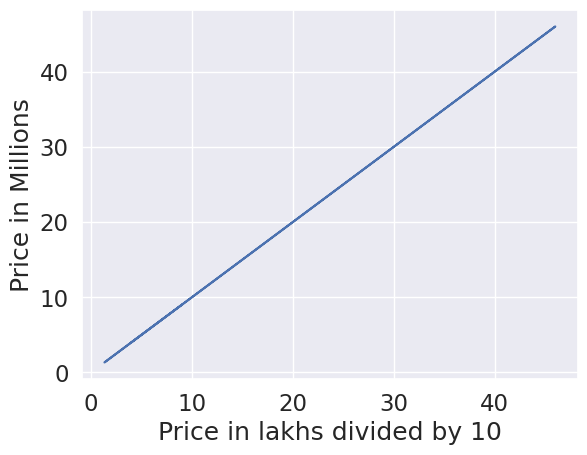

In [ ]:
plt.plot(df_norm["Price in lakhs"]/10.,df_norm["Price in Millions"])
plt.xlabel("Price in lakhs divided by 10")
plt.ylabel("Price in Millions")
plt.show()

NaN Values

In [ ]:
#this function takes the dataset and returns a single line dataframe that contains the filling rate for each column of the dataset
def compute_fill_rate(df):
  """
  Computing the rate of non-NaNs for each column
  Params:
      df: Pandas dataframe, input data
  Return:
      Pandas dataframe
  """
  fr = pd.DataFrame(1-df.isnull().sum().values.reshape(1,-1)/df.shape[0],columns=df.columns)
  return fr

##############################################################
#'plot_fill_rate' function makes a boxplot to show the filling rate per column

def plot_fill_rate(df):
  """
  Plot the fill rate
  df: Pandas dataframe, input data
  """
  fill_rate = compute_fill_rate(df)
  fig,ax = plt.subplots(figsize=(18,18))
  sns.barplot(data=fill_rate, orient="h")
  ax.set_title("Fill rate for columns", fontsize=28)
  ax.set(xlim=(0,1.))

##############################################################

def drop_empty_axis(df, minFillRate , axis=1):
  """
  Drops axes that do not meet the minimum non-Nan rate
  Params:
    df: Pandas dataframe
    minFillRate : float, minimum filled fraction[0,1]
    axis: int, 1 for column, 0 for row
  Returns :
    Pandas dataframe
  """
  i=0 if axis == 1 else 1
  return df.dropna( axis = axis , thresh = int(df.shape[i]*minFillRate))


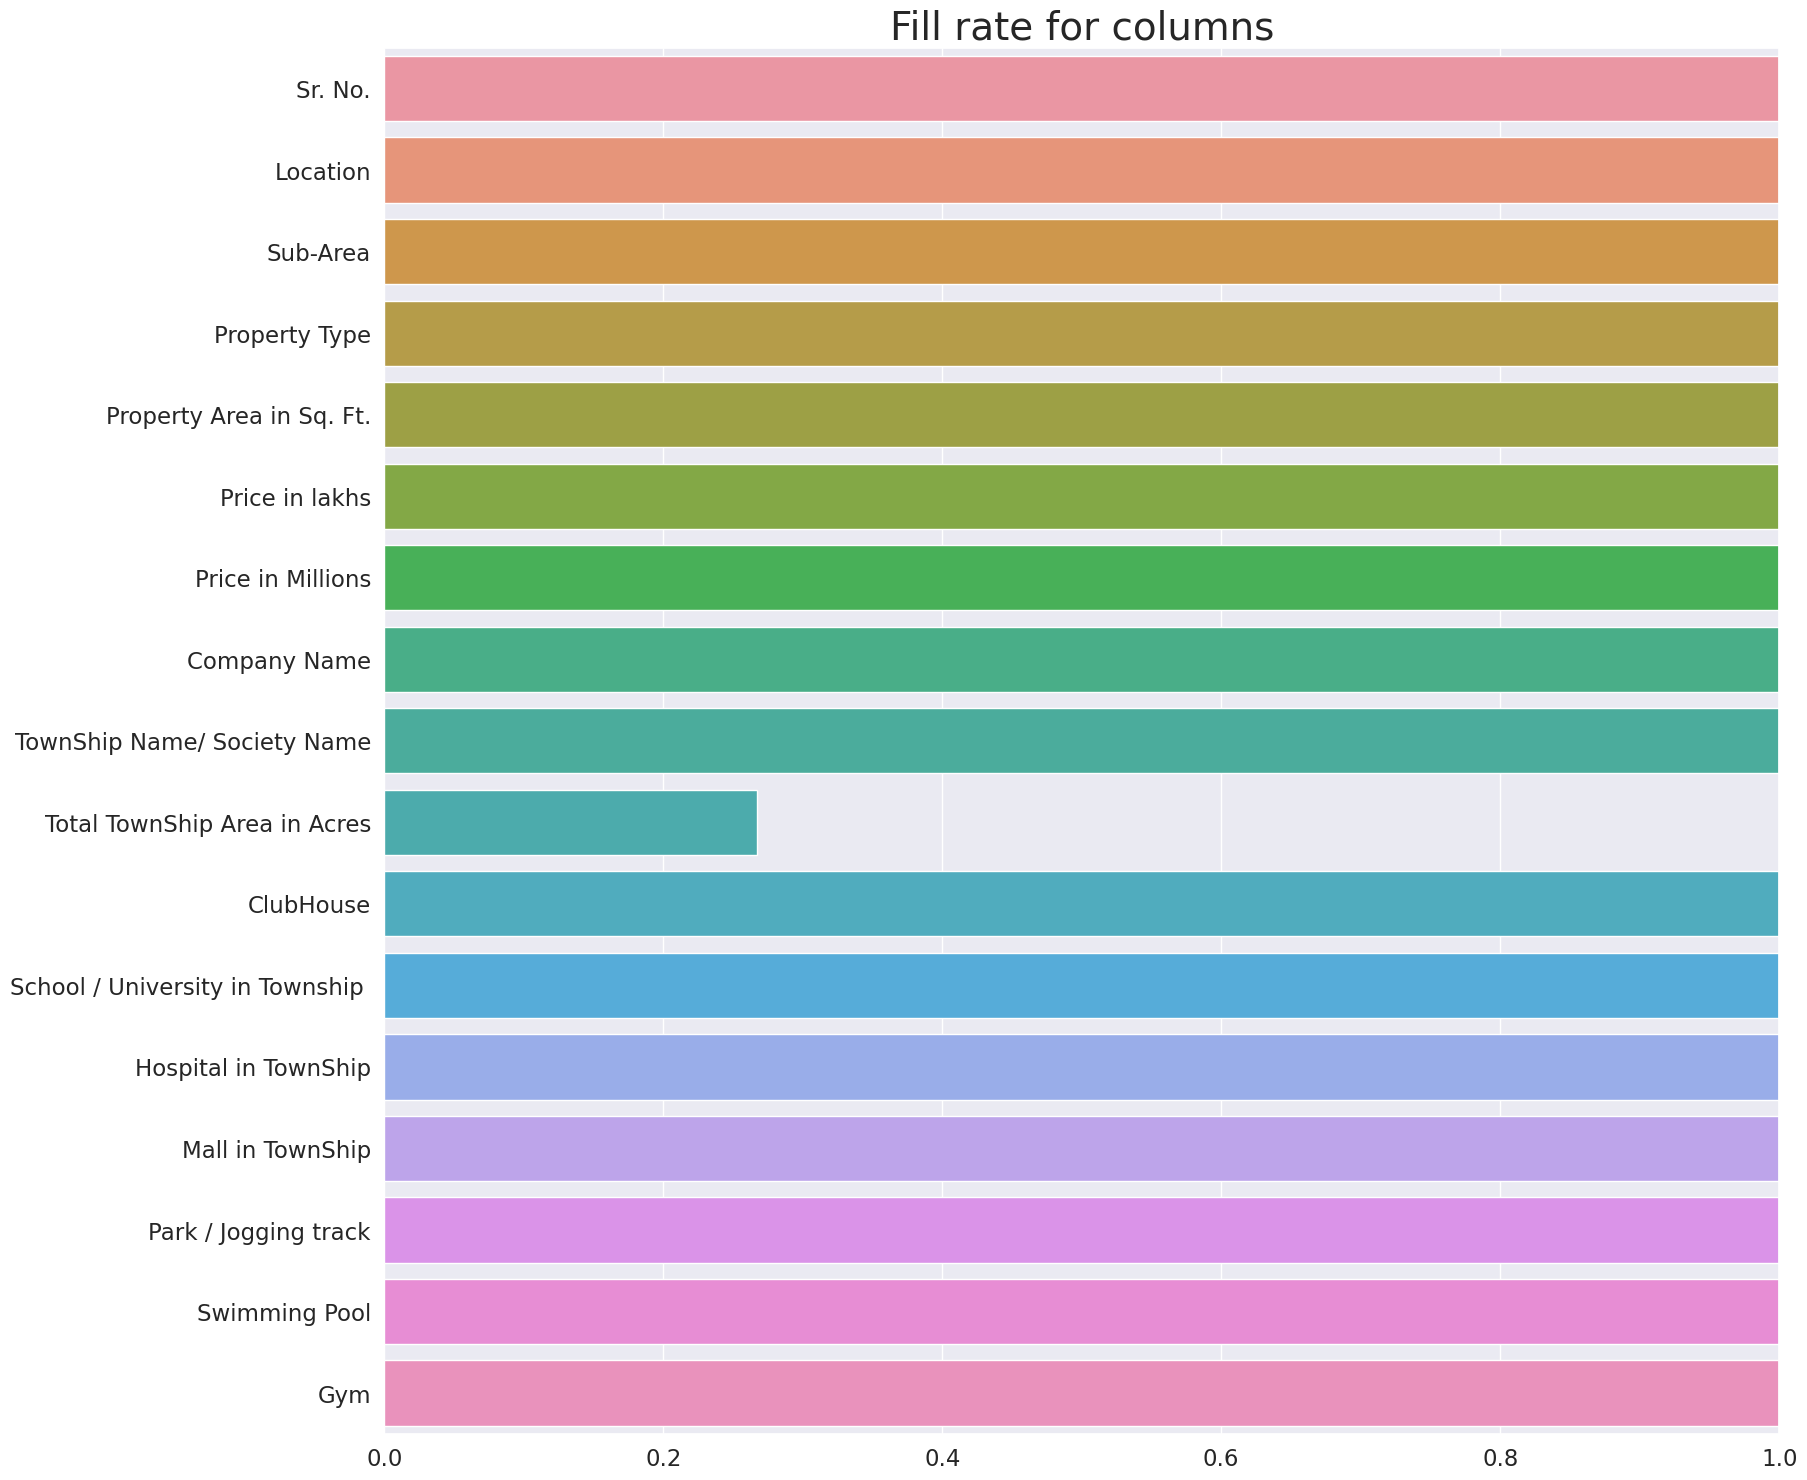

In [ ]:
plot_fill_rate(df_norm)

In [ ]:
compute_fill_rate(df_norm)

Sr. No.  Location  Sub-Area  Property Type  Property Area in Sq. Ft.  \
0      1.0       1.0       1.0            1.0                       1.0   

   Price in lakhs  Price in Millions  Company Name  \
0             1.0                1.0           1.0   

   TownShip Name/ Society Name  Total TownShip Area in Acres  ClubHouse  \
0                          1.0                      0.267016        1.0   

   School / University in Township   Hospital in TownShip  Mall in TownShip  \
0                               1.0                   1.0               1.0   

   Park / Jogging track  Swimming Pool  Gym  
0                   1.0            1.0  1.0

In [ ]:
#totaltownship area in Acres
df_norm[["Sub-Area","TownShip Name/ Society Name", "Total TownShip Area in Acres"]].sort_values("Sub-Area").reset_index(drop=True)

Sub-Area TownShip Name/ Society Name  \
0                      Akurdi            Mantra Sky Tower   
1                      Akurdi            Mantra Sky Tower   
2                      Akurdi            Mantra Sky Tower   
3                      Akurdi            Mantra Sky Tower   
4                      Akurdi            Mantra Sky Tower   
5                      Akurdi            Mantra Sky Tower   
6                       BANER                  TEJ ELEVIA   
7                       BANER              vtp solitaire    
8                       BANER               SUPREME ESTIA   
9                       BANER               SUPREME ESTIA   
10                      BANER               SUPREME ESTIA   
11                      BANER               SUPREME ESTIA   
12                      BANER                  TEJ ELEVIA   
13               BT Kawade RD                 Eternia 2.0   
14               BT Kawade RD                 Presidenta    
15               BT Kawade RD                 Eternia 2.0   
16               BT Kawade RD                 Eternia 2.0   
17               BT Kawade RD                 Eternia 2.0   
18               BT Kawade RD                 Eternia 2.0   
19               BT Kawade RD                 Eternia 2.0   
20               BT Kawade RD                 Presidenta    
21               BT Kawade RD                 Eternia 2.0   
22               BT Kawade RD                 Eternia 2.0   
23                   Balewadi              Mantra Monarch   
24                   Balewadi              Mantra Monarch   
25                   Balewadi                ANP Universe   
26                   Balewadi                ANP Universe   
27                      Baner                  VTP Cierra   
28                      Baner                  VTP Cierra   
29                    Bavdhan                     Vanaha    
30                    Bavdhan                     Vanaha    
31                    Bavdhan                     Vanaha    
32                    Bavdhan                     Vanaha    
33                 Hinjewadi                 Sportsville    
34                 Hinjewadi                 Sportsville    
35                 Hinjewadi                   Sensorium    
36                 Hinjewadi                   Sensorium    
37                 Hinjewadi                   Sensorium    
38                 Hinjewadi                   Sensorium    
39                 Hinjewadi                   Sensorium    
40                 Hinjewadi                 Sportsville    
41                 Hinjewadi                   Sensorium    
42                Karvanagar         River Dale Residency   
43                Karvanagar         River Dale Residency   
44                Karvanagar         River Dale Residency   
45                Karvanagar         River Dale Residency   
46                Karvanagar         River Dale Residency   
47               Keshav Nagar             Mantra Insignia   
48               Keshav Nagar             Mantra Insignia   
49                    Kharadi              Mantra 29 Gold   
50                    Kharadi              Mantra 29 Gold   
51                    Kharadi              Mantra 29 Gold   
52                    Kharadi              Mantra 29 Gold   
53                    Kharadi              Mantra 29 Gold   
54                    Kharadi              Mantra 29 Gold   
55                    Kharadi              Mantra 29 Gold   
56                    Kharadi               Satyam Shivam   
57                    Kharadi               Satyam Shivam   
58                    Kharadi               Satyam Shivam   
59                    Kharadi              Mantra 29 Gold   
60                    Kharadi              Mantra 29 Gold   
61                    Kharadi              Mantra 29 Gold   
62                    Kharadi              Mantra 29 Gold   
63                    Kharadi              Mantra 29 Gold   
64                    Kharadi              Mantra 29 Gol

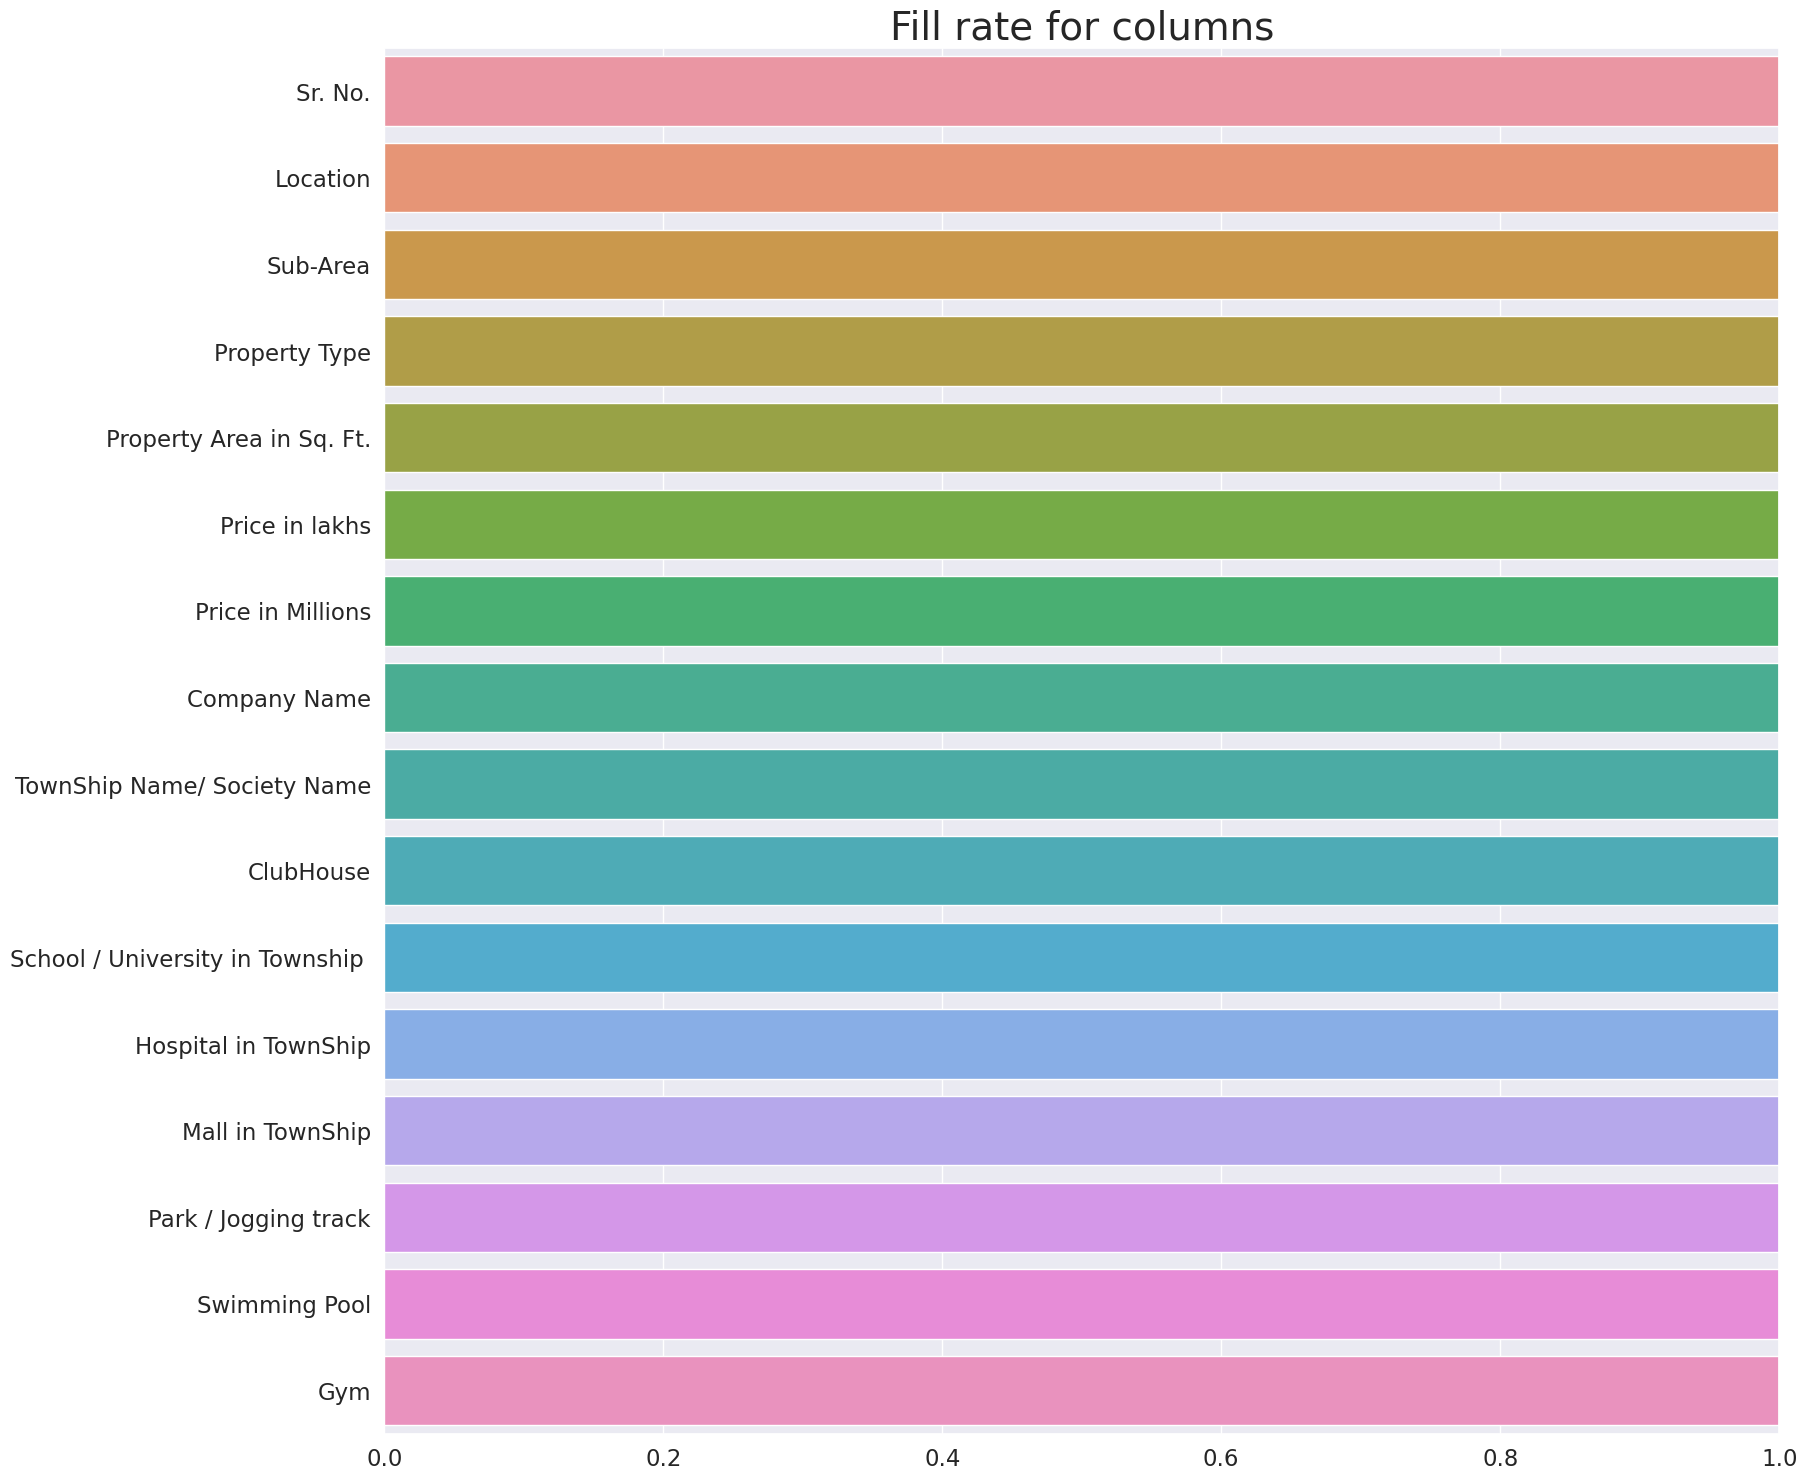

In [ ]:
# Drop columns filled by less than 50%
df_norm = drop_empty_axis(df_norm, minFillRate = .5)
plot_fill_rate(df_norm)

Regularising the categrorical Columns

1.   List item
2.   List item



In [ ]:
df_norm.select_dtypes(include="object").head(3)

Location Sub-Area        Company Name  \
0  Pune, Maharashtra, India  Bavdhan  Shapoorji Paloonji   
1  Pune, Maharashtra, India  Bavdhan  Shapoorji Paloonji   
2  Pune, Maharashtra, India  Bavdhan  Shapoorji Paloonji   

  TownShip Name/ Society Name ClubHouse School / University in Township   \
0                     Vanaha        Yes                              Yes   
1                     Vanaha        Yes                              Yes   
2                     Vanaha        Yes                              Yes   

  Hospital in TownShip Mall in TownShip Park / Jogging track Swimming Pool  \
0                  Yes              Yes                  Yes           Yes   
1                  Yes              Yes                  Yes           Yes   
2                  Yes              Yes                  Yes           Yes   

   Gym  
0  Yes  
1  Yes  
2  Yes

Binary categorical columns

In [ ]:
binary_cols = df_norm.iloc[:,-7:].columns.to_list()
binary_cols

['ClubHouse',
 'School / University in Township ',
 'Hospital in TownShip',
 'Mall in TownShip',
 'Park / Jogging track',
 'Swimming Pool',
 'Gym']

In [ ]:
def print_uniques(cols, df=df_norm):
  for col in cols:
    list_unique = df[col].unique()
    list_unique.sort()
    print(col,":\n", list_unique)
    print("Number of unique categories:", len(list_unique))
    print("-------------------")

In [ ]:
print_uniques(binary_cols)

ClubHouse :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
-------------------
School / University in Township  :
 ['No' 'Yes' 'no']
Number of unique categories: 3
-------------------
Hospital in TownShip :
 ['No' 'Yes' 'no']
Number of unique categories: 3
-------------------
Mall in TownShip :
 ['No' 'Yes' 'no' 'no ']
Number of unique categories: 4
-------------------
Park / Jogging track :
 ['No' 'Yes' 'no' 'yes']
Number of unique categories: 4
-------------------
Swimming Pool :
 ['No' 'Yes' 'no' 'no ' 'yes']
Number of unique categories: 5
-------------------
Gym :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
-------------------


correct all entries to have only two unique values

In [ ]:
for col in binary_cols:
  df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())
print_uniques(binary_cols)

ClubHouse :
 ['no' 'yes']
Number of unique categories: 2
-------------------
School / University in Township  :
 ['no' 'yes']
Number of unique categories: 2
-------------------
Hospital in TownShip :
 ['no' 'yes']
Number of unique categories: 2
-------------------
Mall in TownShip :
 ['no' 'yes']
Number of unique categories: 2
-------------------
Park / Jogging track :
 ['no' 'yes']
Number of unique categories: 2
-------------------
Swimming Pool :
 ['no' 'yes']
Number of unique categories: 2
-------------------
Gym :
 ['no' 'yes']
Number of unique categories: 2
-------------------


Multi-categorical Columns

In [ ]:
obj_cols = df_norm.select_dtypes(include="object").columns.to_list()
multiCat_cols = list(set(obj_cols)^set(binary_cols))
multiCat_cols

['Location', 'Company Name', 'TownShip Name/ Society Name', 'Sub-Area']

In [ ]:
#convert all the cols to small letter and remove any extra space
for col in multiCat_cols:
  df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())
print_uniques(multiCat_cols)

Location :
 ['pune, maharashtra, india']
Number of unique categories: 1
-------------------
Company Name :
 ['ace constructions' 'anp corp' 'bhaktamar realities' 'calyx spaces'
 'dolphin group' 'godrej properties' 'jhala group' 'kalpataru'
 'keystone landmark' 'kohinoor group' 'kundan spaces' 'lush life'
 'maha anand pinnac associates' 'majestique landmarks' 'mantra properties'
 'nirman developers' 'oxy buildcorp' 'porwal  develkoper'
 'porwal & anand develkoper' 'proviso group' 'puraniks' 'ravima ventures'
 'sagitarius ecospaces llp' 'shapoorji paloonji' 'shroff developers'
 'sukwani associates' 'supreme' 'tejraaj group' 'unique properties'
 'urban space creator' 'vasupujya corporation'
 'venkatesh bhoomi construction' 'vijaya laxmi creations'
 'vijaya laxmi infrarealtors' 'vtp reality' 'waghvani constructions'
 'wellwisher apartments']
Number of unique categories: 37
-------------------
TownShip Name/ Society Name :
 ['7hills' 'abitante fiore' 'anp universe' 'anutham' 'atulya kanhe'


In [ ]:
df_norm.drop(columns=["Location"], inplace=True)
df_norm.drop(columns=["Price in lakhs"], inplace=True)

In [ ]:
df_norm.head()

Sr. No.   Sub-Area  Property Type  Property Area in Sq. Ft.  \
0        1    bavdhan            1.0                     492.0   
1        2    bavdhan            2.0                     774.0   
2        3    bavdhan            3.0                     889.0   
3        4    bavdhan            3.0                    1018.0   
4        5  mahalunge            2.0                     743.0   

   Price in Millions        Company Name TownShip Name/ Society Name  \
0                3.9  shapoorji paloonji                      vanaha   
1                6.5  shapoorji paloonji                      vanaha   
2                7.4  shapoorji paloonji                      vanaha   
3                8.9  shapoorji paloonji                      vanaha   
4                7.4   godrej properties        godrej hills retreat   

  ClubHouse School / University in Township  Hospital in TownShip  \
0       yes                              yes                  yes   
1       yes                              yes                  yes   
2       yes                              yes                  yes   
3       yes                              yes                  yes   
4       yes                              yes                  yes   

  Mall in TownShip Park / Jogging track Swimming Pool  Gym  
0              yes                  yes           yes  yes  
1              yes                  yes           yes  yes  
2              yes                  yes           yes  yes  
3              yes                  yes           yes  yes  
4              yes                  yes           yes  yes

In [ ]:
df_norm.shape

(191, 14)

Saving the cleaned data set as csv file

In [ ]:
#Rename the columns to simplify the column names before saving as csv file
df_norm.columns=["index","sub_area","n_bhk","surface","price","company_name","township","club_house","school","hospital","mall","park","pool","gym"]


In [ ]:
df_norm.to_csv("read_clean.csv",index=False) #save as csv file

Data Analysis
**StandardScaler:** regularizes the variation interval of the columns. So all the columns will vary within the same order or magnitudes. Through StandardScaling, the trained parameters of the linear regression model will have a smooth distribution.
**LabelEncoder:** will encode categorical labels with the value between 0 and 'number of categories - 1'. this class will be applied on the binary columns of the dataset.
**OneHotEncoder:**encodes the categorical variables to dummy variables. We apply this class to sub-area columns to convert the sub-area names to numbers

In [ ]:
sns.set(font_scale=1.5)

In [ ]:
df = pd.read_csv("read_clean.csv")

Preliminary Exploration

In [ ]:
df.shape, df.columns, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         191 non-null    int64  
 1   sub_area      191 non-null    object 
 2   n_bhk         191 non-null    float64
 3   surface       191 non-null    float64
 4   price         191 non-null    float64
 5   company_name  191 non-null    object 
 6   township      191 non-null    object 
 7   club_house    191 non-null    object 
 8   school        191 non-null    object 
 9   hospital      191 non-null    object 
 10  mall          191 non-null    object 
 11  park          191 non-null    object 
 12  pool          191 non-null    object 
 13  gym           191 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 21.0+ KB


((191, 14),
 Index(['index', 'sub_area', 'n_bhk', 'surface', 'price', 'company_name',
        'township', 'club_house', 'school', 'hospital', 'mall', 'park', 'pool',
        'gym'],
       dtype='object'),
 None)

In [ ]:
df["company_name"].unique(),df["township"].unique()

(array(['shapoorji paloonji', 'godrej properties', 'anp corp',
        'urban space creator', 'vtp reality', 'waghvani constructions',
        'sukwani associates', 'mantra properties', 'ravima ventures',
        'proviso group', 'unique properties', 'sagitarius ecospaces llp',
        'nirman developers', 'jhala group', 'shroff developers',
        'kundan spaces', 'venkatesh bhoomi construction', 'lush life',
        'maha anand pinnac associates', 'vasupujya corporation',
        'ace constructions', 'wellwisher apartments', 'dolphin group',
        'oxy buildcorp', 'kohinoor group', 'bhaktamar realities',
        'porwal & anand develkoper', 'porwal  develkoper',
        'keystone landmark', 'puraniks', 'majestique landmarks',
        'kalpataru', 'vijaya laxmi creations',
        'vijaya laxmi infrarealtors', 'calyx spaces', 'supreme',
        'tejraaj group'], dtype=object),
 array(['vanaha', 'godrej hills retreat', 'anp universe', 'urban skyline',
        'vtp cierra', 'vtp blue

Exclude the company_name and township column from our analysis since they   produce lot of dummy data for a dataset that doesnt contain too many entries.
These entries will make weak correlation with price.

In [ ]:
df = df.drop(columns=["index","company_name","township"]).drop_duplicates()

In [ ]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sub_area    191 non-null    object 
 1   n_bhk       191 non-null    float64
 2   surface     191 non-null    float64
 3   price       191 non-null    float64
 4   club_house  191 non-null    object 
 5   school      191 non-null    object 
 6   hospital    191 non-null    object 
 7   mall        191 non-null    object 
 8   park        191 non-null    object 
 9   pool        191 non-null    object 
 10  gym         191 non-null    object 
dtypes: float64(3), object(8)
memory usage: 17.9+ KB


(None, (191, 11))

Converting binary columns to dummy variables

In [ ]:
#selecting binary columns
binary_cols= df.iloc[:,4:].columns.to_list()
binary_cols

['club_house', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']

In [ ]:
# average price for apartments with and without swimming pool
df[["price","pool"]].groupby("pool")["price"].mean()

pool
no      6.470113
yes    10.039575
Name: price, dtype: float64

In [ ]:
#transforming the yes/no to 1/0 by applying LabelEncoder class
laben = LabelEncoder()
for col in binary_cols:
  df[col]=laben.fit_transform(df[col])
df.tail(10)

sub_area  n_bhk  surface   price  club_house  school  hospital  mall  \
181   bavdhan    2.0    665.0   6.499           1       0         0     0   
182  talegoan    1.0    280.0   1.319           1       0         0     0   
183  talegoan    2.0    385.0   1.729           1       0         0     0   
184     baner    2.0    730.0   8.700           1       0         0     0   
185     baner    3.0   1135.0  12.900           1       0         0     0   
186     baner    3.0   1350.0  16.000           1       0         0     0   
187     baner    4.0   1600.0  23.000           1       0         0     0   
188     baner    2.0    789.0   9.500           0       0         0     0   
189     baner    3.0   1107.0  13.500           0       0         0     0   
190     baner    2.0    776.0   9.068           1       0         0     0   

     park  pool  gym  
181     1     0    0  
182     1     1    1  
183     1     0    1  
184     1     1    1  
185     1     1    1  
186     1     1    1  
187     1     1    1  
188     1     1    1  
189     1     1    1  
190     1     1    1

Sub Areas Contribution

In [ ]:
# Contribution of different sub-areas on the dataset
df_sa_count = df.groupby("sub_area")["price"].count().reset_index()\
                .rename(columns={"price":"count"})\
                .sort_values("count",ascending=False)\
                .reset_index(drop=True)
#frequency
df_sa_count["sa_contribution"] = df_sa_count["count"]/len(df)

df_sa_count

sub_area  count  sa_contribution
0                    kharadi     16         0.083770
1                      baner     12         0.062827
2                      ravet     12         0.062827
3                    bavdhan     10         0.052356
4               bt kawade rd     10         0.052356
5                  handewadi     10         0.052356
6              wadgaon sheri      9         0.047120
7                  hinjewadi      9         0.047120
8                  mahalunge      9         0.047120
9                   hadapsar      8         0.041885
10                      nibm      8         0.041885
11                vimannagar      6         0.031414
12                   susgaon      6         0.031414
13                    akurdi      6         0.031414
14            bavdhan budruk      6         0.031414
15                   mundhwa      5         0.026178
16                karvanagar      5         0.026178
17                    kiwale      4         0.020942
18                  balewadi      4         0.020942
19                 tathawade      4         0.020942
20                   dhanori      4         0.020942
21                    manjri      4         0.020942
22                    pisoli      4         0.020942
23  kirkatwadi sinhagad road      3         0.015707
24              kayani nagar      2         0.010471
25              mohammadwadi      2         0.010471
26              keshav nagar      2         0.010471
27                magarpatta      2         0.010471
28                  talegoan      2         0.010471
29                  lonavala      2         0.010471
30                     undri      2         0.010471
31             koregaon park      2         0.010471
32                  koregoan      1         0.005236

<Axes: xlabel='count', ylabel='sub_area'>

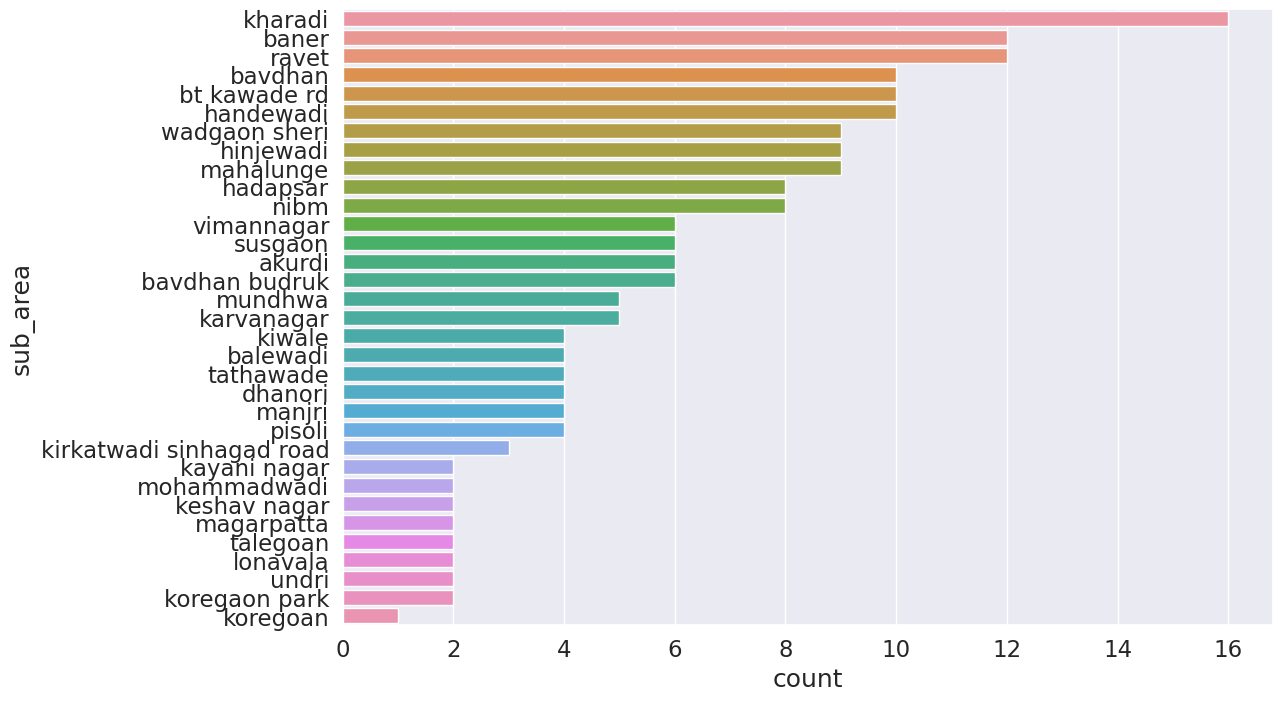

In [ ]:
#Distribution of sub-areas contribution
fig, ax=plt.subplots(figsize=(12,8))
sns.barplot(data=df_sa_count,x="count",y="sub_area" ,ax=ax)

In [ ]:
len(df_sa_count), np.mean(df_sa_count["count"])

(33, 5.787878787878788)

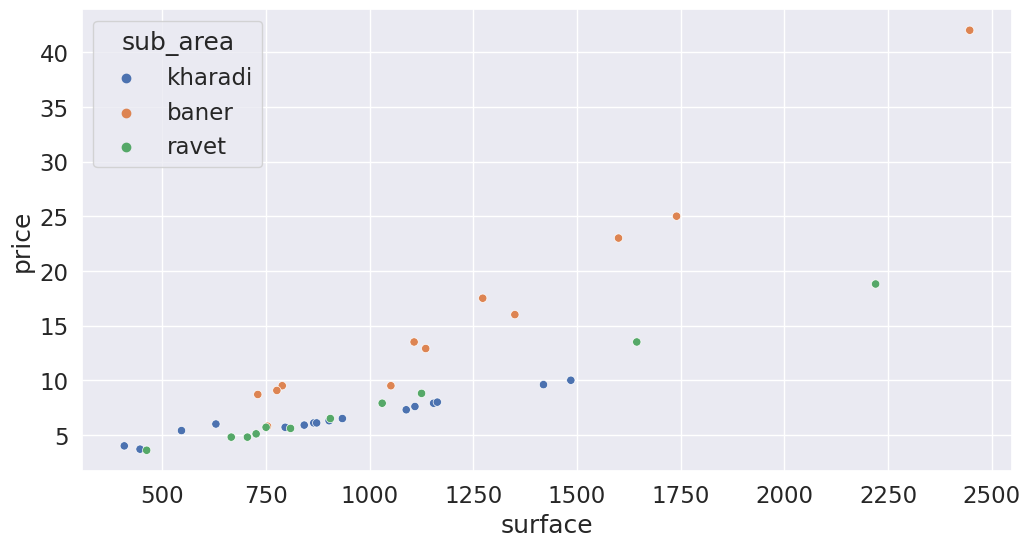

In [ ]:
# Price vs surface for the first three most contributions
fig, ax = plt.subplots(figsize=(12,6))
df_plot = df_sa_count.merge(df[["sub_area","surface","price"]], on="sub_area")
df_plot = df_plot[df_plot["count"]>11]

sns.scatterplot(data=df_plot, x = "surface", y = "price", hue="sub_area")
plt.show()

Feature Engineering

In [ ]:
sa_sel_col=df_sa_count.loc[df_sa_count["count"]>7, "sub_area"].to_list()
df["sub_area"] = df["sub_area"].where(df["sub_area"].isin(sa_sel_col),"other")


In [ ]:
df["sub_area"].unique(),len(df["sub_area"].unique())

(array(['bavdhan', 'mahalunge', 'other', 'ravet', 'baner', 'kharadi',
        'hadapsar', 'handewadi', 'nibm', 'bt kawade rd', 'hinjewadi',
        'wadgaon sheri'], dtype=object),
 12)

Converting Sub-Area to dummy variables

Each of 12 different subareas will be transformed to vector of 12 elements after oneHotEncoding. All the elements but 1 are zeros. That is why the transformation done by oneHotEncoder keeps the dummy variables in sparse matrix

In [ ]:
# dummy variable conversion
hoten= OneHotEncoder(sparse=False)
X_dummy = hoten.fit_transform(df[["sub_area"]])
X_dummy.shape, X_dummy, X_dummy.dtype

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((191, 12),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 dtype('float64'))

In [ ]:
#Type conversion
X_dummy = X_dummy.astype("int64")

In [ ]:
#Adding the dummy columns to the dataset
sa_cols_name = ["sa"+str(i+1) for i in range(X_dummy.shape[1])]
df.loc[:,sa_cols_name] = X_dummy
#using df.iloc instead of
df.iloc[:, df.columns.isin(sa_cols_name)] = X_dummy
df.head()

<ipython-input-71-0fa43a9ea75e>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,sa_cols_name] = X_dummy


sub_area  n_bhk  surface  price  club_house  school  hospital  mall  park  \
0    bavdhan    1.0    492.0    3.9           1       1         1     1     1   
1    bavdhan    2.0    774.0    6.5           1       1         1     1     1   
2    bavdhan    3.0    889.0    7.4           1       1         1     1     1   
3    bavdhan    3.0   1018.0    8.9           1       1         1     1     1   
4  mahalunge    2.0    743.0    7.4           1       1         1     1     1   

   pool  gym  sa1  sa2  sa3  sa4  sa5  sa6  sa7  sa8  sa9  sa10  sa11  sa12  
0     1    1    0    1    0    0    0    0    0    0    0     0     0     0  
1     1    1    0    1    0    0    0    0    0    0    0     0     0     0  
2     1    1    0    1    0    0    0    0    0    0    0     0     0     0  
3     1    1    0    1    0    0    0    0    0    0    0     0     0     0  
4     1    1    0    0    0    0    0    0    0    1    0     0     0     0

In [ ]:
#Sub area and dummy columns relationship
df[["sub_area"]+sa_cols_name].drop_duplicates()\
            .sort_values("sub_area").reset_index(drop=True)

sub_area  sa1  sa2  sa3  sa4  sa5  sa6  sa7  sa8  sa9  sa10  sa11  \
0           baner    1    0    0    0    0    0    0    0    0     0     0   
1         bavdhan    0    1    0    0    0    0    0    0    0     0     0   
2    bt kawade rd    0    0    1    0    0    0    0    0    0     0     0   
3        hadapsar    0    0    0    1    0    0    0    0    0     0     0   
4       handewadi    0    0    0    0    1    0    0    0    0     0     0   
5       hinjewadi    0    0    0    0    0    1    0    0    0     0     0   
6         kharadi    0    0    0    0    0    0    1    0    0     0     0   
7       mahalunge    0    0    0    0    0    0    0    1    0     0     0   
8            nibm    0    0    0    0    0    0    0    0    1     0     0   
9           other    0    0    0    0    0    0    0    0    0     1     0   
10          ravet    0    0    0    0    0    0    0    0    0     0     1   
11  wadgaon sheri    0    0    0    0    0    0    0    0    0     0     0   

    sa12  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      0  
8      0  
9      0  
10     0  
11     1

Univariates and bivariate analysis

In [ ]:
data=df.select_dtypes(exclude="object")
data.head()

n_bhk  surface  price  club_house  school  hospital  mall  park  pool  gym  \
0    1.0    492.0    3.9           1       1         1     1     1     1    1   
1    2.0    774.0    6.5           1       1         1     1     1     1    1   
2    3.0    889.0    7.4           1       1         1     1     1     1    1   
3    3.0   1018.0    8.9           1       1         1     1     1     1    1   
4    2.0    743.0    7.4           1       1         1     1     1     1    1   

   sa1  sa2  sa3  sa4  sa5  sa6  sa7  sa8  sa9  sa10  sa11  sa12  
0    0    1    0    0    0    0    0    0    0     0     0     0  
1    0    1    0    0    0    0    0    0    0     0     0     0  
2    0    1    0    0    0    0    0    0    0     0     0     0  
3    0    1    0    0    0    0    0    0    0     0     0     0  
4    0    0    0    0    0    0    0    1    0     0     0     0

In [ ]:
data.describe()# genereal view of the distribution of the columns

n_bhk      surface       price  club_house      school  \
count  191.000000   191.000000  191.000000  191.000000  191.000000   
mean     2.471204   898.523560    8.712707    0.738220    0.031414   
std      1.186751   376.550204    5.860711    0.440759    0.174891   
min      1.000000   280.000000    1.319000    0.000000    0.000000   
25%      2.000000   670.000000    5.078000    0.000000    0.000000   
50%      2.000000   796.000000    7.000000    1.000000    0.000000   
75%      3.000000  1055.500000    9.793500    1.000000    0.000000   
max      9.000000  2447.000000   46.000000    1.000000    1.000000   

         hospital        mall        park        pool         gym         sa1  \
count  191.000000  191.000000  191.000000  191.000000  191.000000  191.000000   
mean     0.031414    0.031414    0.979058    0.628272    0.811518    0.062827   
std      0.174891    0.174891    0.143568    0.484536    0.392124    0.243290   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    0.000000    1.000000    0.000000   
50%      0.000000    0.000000    1.000000    1.000000    1.000000    0.000000   
75%      0.000000    0.000000    1.000000    1.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              sa2         sa3         sa4         sa5         sa6        sa7  \
count  191.000000  191.000000  191.000000  191.000000  191.000000  191.00000   
mean     0.052356    0.052356    0.041885    0.052356    0.047120    0.08377   
std      0.223329    0.223329    0.200852    0.223329    0.212453    0.27777   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.00000   

              sa8         sa9        sa10        sa11        sa12  
count  191.000000  191.000000  191.000000  191.000000  191.000000  
mean     0.047120    0.041885    0.408377    0.062827    0.047120  
std      0.212453    0.200852    0.492825    0.243290    0.212453  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000

Continuous Variables

<function matplotlib.pyplot.show(close=None, block=None)>

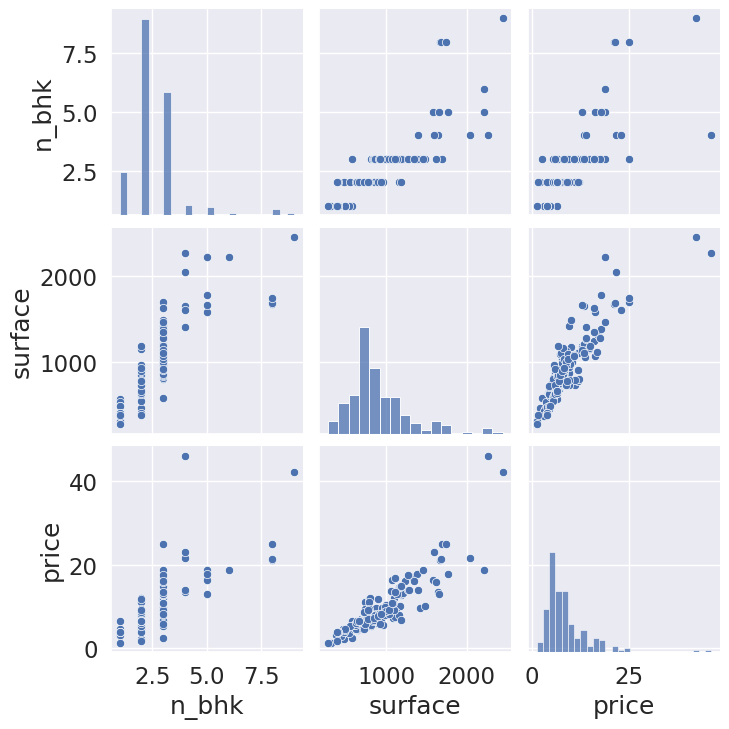

In [ ]:
float_cols = data.select_dtypes(include="float"). columns.to_list()
sns.pairplot(data[float_cols])
plt.show

Binary Variables

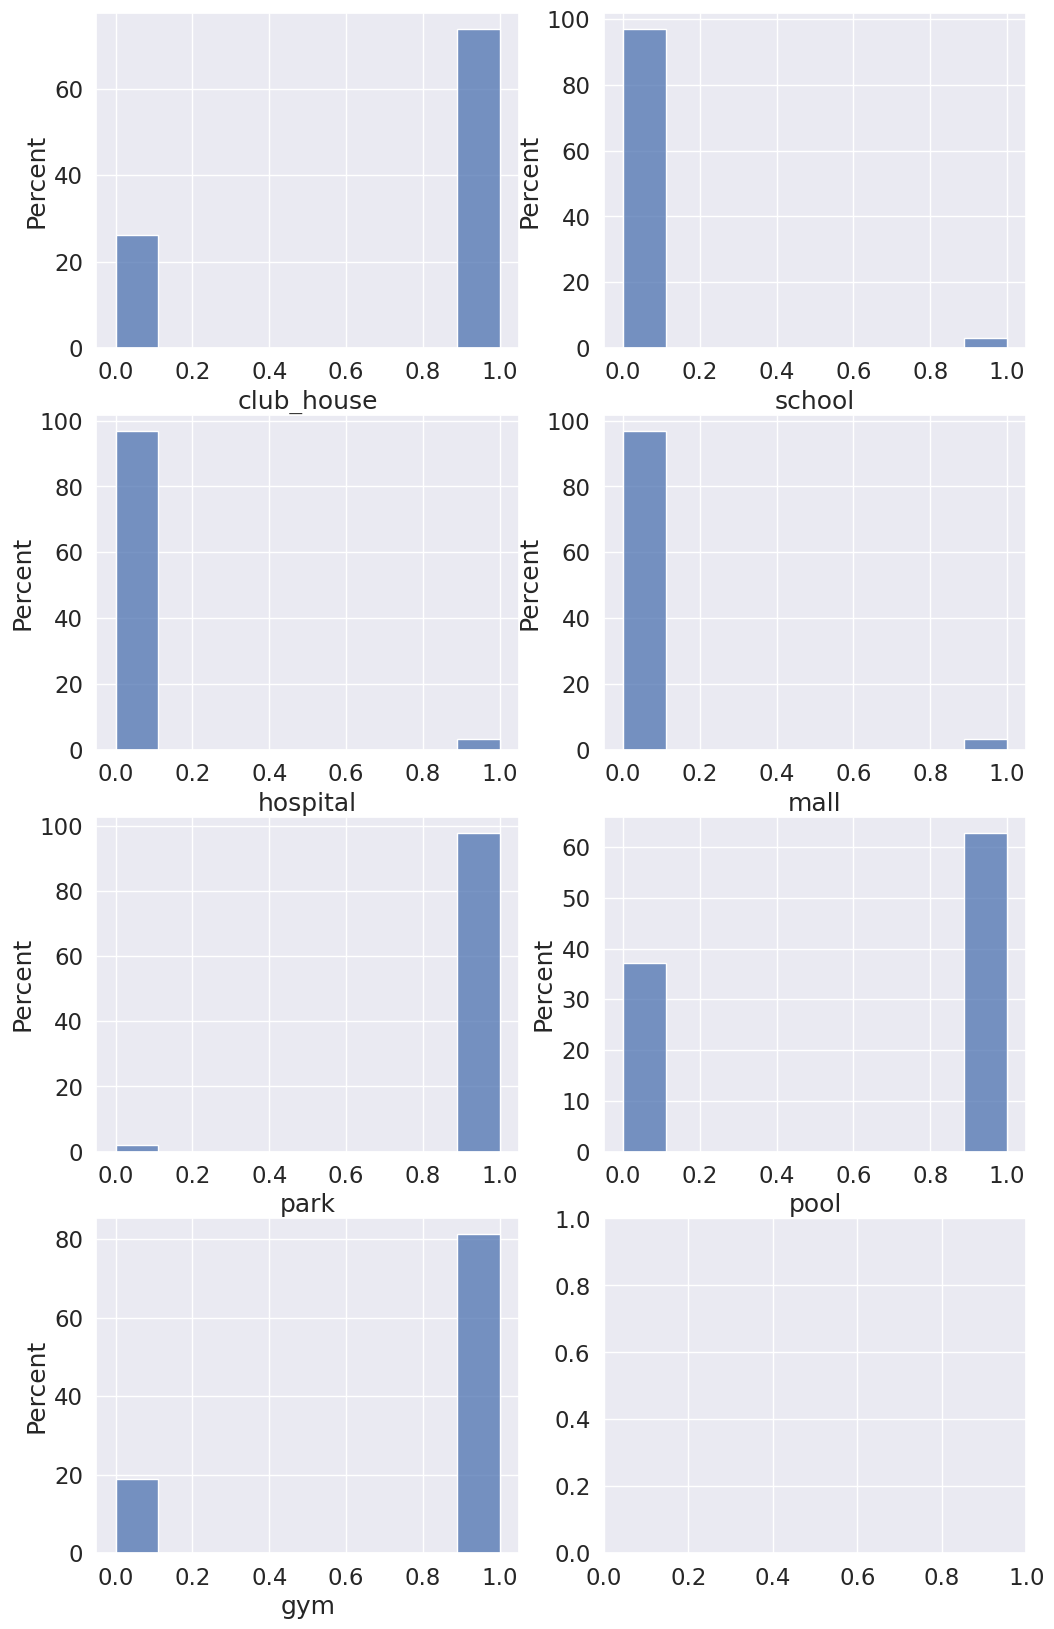

In [ ]:
fig, ax= plt.subplots(4,2, figsize=(12,20))
for i , col in enumerate(binary_cols):
  sns.histplot(data,x=col, ax=ax[int(i/2),i%2], stat="percent")

Correlation map

<ipython-input-77-4274f75987eb>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correl, dtype=np.bool)


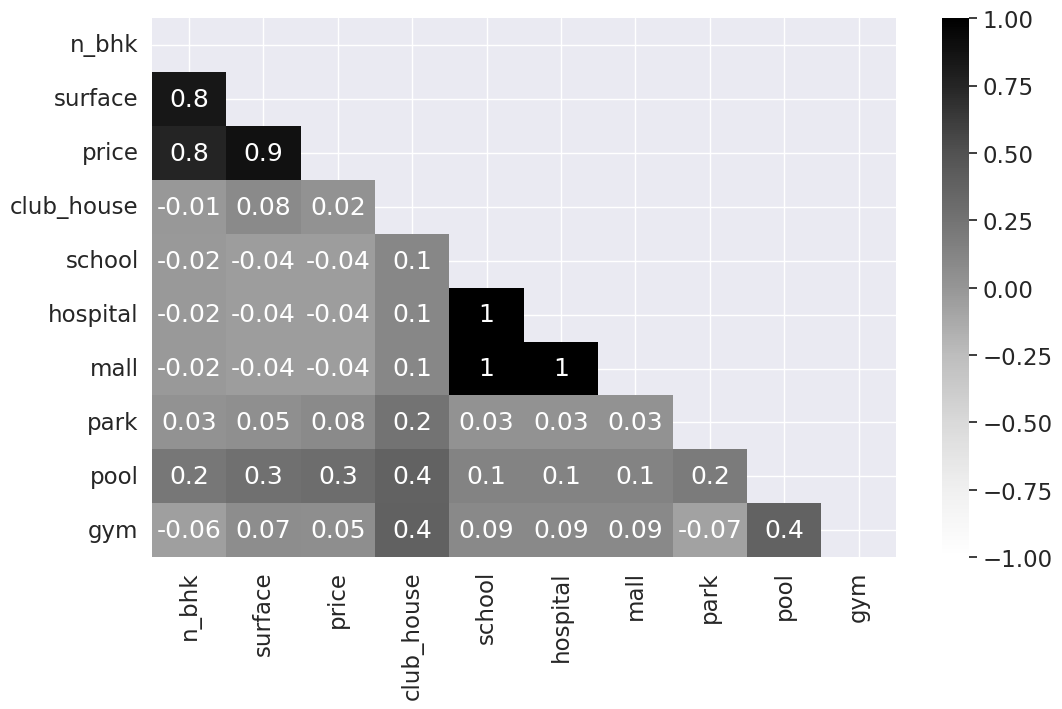

In [ ]:
corr_cols_list = float_cols+binary_cols
correl = data[corr_cols_list].corr()
mask = np.zeros_like(correl, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize =(12,7))
sns.heatmap(correl,mask=mask, vmin=-1, cmap='Greys', annot=True, fmt='.1g')
plt.show()


Feature Selection

In [ ]:
#price correlation with al other columns
corr_cols_list.remove("price")
corr_cols_list.extend(sa_cols_name)
corr_list = [] #to keep the correlations with price
for col in corr_cols_list:
  corr_list.append(round(data["price"].corr(data[col]),2))
corr_list

[0.76,
 0.88,
 0.02,
 -0.04,
 -0.04,
 -0.04,
 0.08,
 0.3,
 0.05,
 0.32,
 -0.12,
 0.08,
 -0.04,
 -0.17,
 0.0,
 -0.11,
 -0.05,
 0.23,
 -0.03,
 -0.0,
 -0.07]

In [ ]:
#sorted correlations
df_corr = pd.DataFrame(data=zip(corr_cols_list,corr_list), columns=["col_name","corr"])\
          .sort_values("corr",ascending=False)\
          .reset_index(drop=True)

df_corr

col_name  corr
0      surface  0.88
1        n_bhk  0.76
2          sa1  0.32
3         pool  0.30
4          sa9  0.23
5          sa3  0.08
6         park  0.08
7          gym  0.05
8   club_house  0.02
9         sa11 -0.00
10         sa6  0.00
11        sa10 -0.03
12        mall -0.04
13    hospital -0.04
14      school -0.04
15         sa4 -0.04
16         sa8 -0.05
17        sa12 -0.07
18         sa7 -0.11
19         sa2 -0.12
20         sa5 -0.17

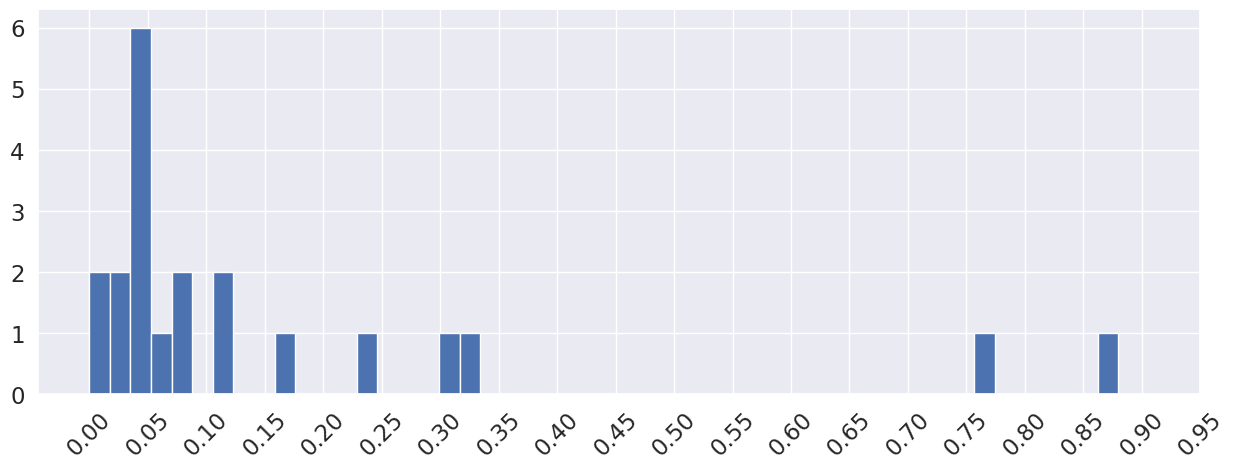

In [ ]:
#Distribution of correlations with price
fig, ax = plt.subplots(figsize=(15,5))
abs(df_corr["corr"]).hist(bins=50)
ax.set_xticks(np.arange(0, 1 , 0.05))
plt.xticks(rotation=45)
plt.show()

In [ ]:
#select list of features who have a strong correlation with price
features = df_corr.loc[abs(df_corr["corr"])>.1, "col_name"].to_list()
features,len(features)

(['surface', 'n_bhk', 'sa1', 'pool', 'sa9', 'sa7', 'sa2', 'sa5'], 8)

In [ ]:
#keeping the sub area's name, their mean price and frequency(count)
sa_feature_list= [sa for sa in features if "sa" in sa]
lst=[]
for col in sa_feature_list:
  sa_triger = df[col]==1
  sa = df.loc[sa_triger,"sub_area"].to_list()[0]
  x = df.loc[sa_triger,"price"]
  lst.append((sa,np.mean(x),df[col].sum()))

lst


[('baner', 16.038999999999998, 12),
 ('nibm', 15.1, 8),
 ('kharadi', 6.6310625000000005, 16),
 ('bavdhan', 5.804400000000001, 10),
 ('handewadi', 4.4735000000000005, 10)]

In [ ]:
#sub area mean price comparision
sa_f = pd.DataFrame(lst,columns=["sub_area","mean_price","count"])
sa_f["total_mean_price"] = np.mean(df["price"])
sa_f

sub_area  mean_price  count  total_mean_price
0      baner   16.039000     12          8.712707
1       nibm   15.100000      8          8.712707
2    kharadi    6.631063     16          8.712707
3    bavdhan    5.804400     10          8.712707
4  handewadi    4.473500     10          8.712707

Data Scaling

In [ ]:
#Selection of the final dataset
sel_data = data[features+["price"]].copy()
sel_data.head()

surface  n_bhk  sa1  pool  sa9  sa7  sa2  sa5  price
0    492.0    1.0    0     1    0    0    1    0    3.9
1    774.0    2.0    0     1    0    0    1    0    6.5
2    889.0    3.0    0     1    0    0    1    0    7.4
3   1018.0    3.0    0     1    0    0    1    0    8.9
4    743.0    2.0    0     1    0    0    0    0    7.4

In [ ]:
#Standard scaling for the surface
sc = StandardScaler(with_std=True, with_mean=True)
sel_data["surface"] = sc.fit_transform(sel_data[["surface"]])
sel_data

surface  n_bhk  sa1  pool  sa9  sa7  sa2  sa5   price
0   -1.082437    1.0    0     1    0    0    1    0   3.900
1   -0.331565    2.0    0     1    0    0    1    0   6.500
2   -0.025358    3.0    0     1    0    0    1    0   7.400
3    0.318126    3.0    0     1    0    0    1    0   8.900
4   -0.414108    2.0    0     1    0    0    0    0   7.400
5    0.203631    3.0    0     1    0    0    0    0   9.500
6   -0.010713    2.0    0     1    0    0    0    0   7.500
7    0.734834    3.0    0     1    0    0    0    0  10.000
8    0.017245    2.0    0     1    0    0    0    0   6.500
9    0.603032    3.0    0     1    0    0    0    0   8.800
10   1.984956    4.0    0     1    0    0    0    0  13.500
11   3.518653    5.0    0     1    0    0    0    0  18.800
12   3.518653    6.0    0     1    0    0    0    0  18.800
13  -0.386150    2.0    1     1    0    0    0    0   5.800
14   0.405994    3.0    1     1    0    0    0    0   9.500
15  -1.266161    1.0    0     1    0    0    0    0   4.000
16  -0.621796    2.0    0     1    0    0    0    0   5.800
17  -0.053316    3.0    0     1    0    0    0    0   7.800
18  -1.162317    1.0    0     1    0    0    0    0   3.600
19  -0.619133    2.0    0     1    0    0    0    0   4.800
20  -0.395469    2.0    0     1    0    0    0    0   5.700
21   0.350078    3.0    0     1    0    0    0    0   7.900
22  -1.204920    1.0    0     0    0    1    0    0   3.700
23  -0.272986    2.0    0     0    0    1    0    0   5.700
24  -0.150503    2.0    0     0    0    1    0    0   5.900
25  -0.089262    2.0    0     0    0    1    0    0   6.100
26   0.009257    2.0    0     0    0    1    0    0   6.300
27   0.680249    2.0    0     0    0    1    0    0   7.900
28  -0.070623    3.0    0     0    0    1    0    0   6.100
29   0.094462    3.0    0     0    0    1    0    0   6.500
30   0.504513    3.0    0     0    0    1    0    0   7.300
31   0.560429    3.0    0     0    0    1    0    0   7.600
32   0.704213    3.0    0     0    0    1    0    0   8.000
33   1.385856    3.0    0     0    0    1    0    0   9.600
34   1.561592    3.0    0     0    0    1    0    0  10.000
35  -0.571205    2.0    0     1    0    0    0    0   7.000
36   0.243571    3.0    0     1    0    0    0    0   9.000
37  -0.043997    2.0    0     1    0    0    0    0   9.700
38   0.544453    3.0    0     1    0    0    0    0  12.000
39  -0.946641    1.0    0     1    0    0    0    0   4.200
40   0.171679    2.0    0     1    0    0    0    0   5.700
41  -1.540416    1.0    0     1    0    0    0    0   1.400
42  -1.133028    2.0    0     1    0    0    0    0   2.200
43  -0.845460    3.0    0     1    0    0    0    0   2.600
44  -0.288962    2.0    0     1    0    0    0    0   8.000
45  -0.209082    2.0    0     1    0    0    0    0   8.300
46   0.240909    3.0    0     1    0    0    0    0  10.100
47   0.278186    3.0    0     1    0    0    0    0  10.300
48   0.754804    3.0    0     1    0    0    0    0  12.800
49   1.811883    5.0    0     1    0    0    0    0  16.300
50  -1.085100    1.0    0     0    0    0    0    0   3.900
51  -0.637772    2.0    0     0    0    0    0    0   5.100
52  -0.443397    2.0    0     0    0    0    0    0   6.000
53  -0.238372    3.0    0     0    0    0    0    0   6.600
54  -1.167643    1.0    0     1    0    0    0    0   4.550
55  -0.438072    2.0    0     1    0    0    0    0   7.250
56  -0.387481    2.0    0     1    0    0    0    0   7.350
57  -0.595169    2.0    0     0    0    0    0    0   6.200
58   0.049197    3.0    0     0    0    0    0    0   8.400
59  -0.608482    2.0    0     1    0    0    0    0   5.414
60  -0.422096    2.0    0     1    0    0    0    0   5.832
61   0.243571    3.0    0     1    0    0    0    0   7.902
62   0.355403    3.0    0     1    0    0    0    0   8.210
63   2.128740    3.0    0     1    0    0    0    0  24.900
64   3.643798    4.0    0     1    0    0    0    0  46.000
65  -0.608482    2.0    0     1    0    0    0

Saving the data

In [ ]:
sel_data.to_csv("resd_features.csv", index=False)

1.**xgboost packagae:** loss function is minimized throuh optimized gradient descent technique, called gradient boosting. Xtreme gradient boosting can be considered as ensemble of decision trees. these decision trees are added one by one to the ensemble to reduce the error of the previous tree. The trees are considered as weak learner, since they improve the code little by little. Hence this method is called boosting since it contains sequential ensemble learninig.

**2.Support Vector Regression**:SVR stands for Support Vector Regression. It is a type of regression analysis that uses support vector machines (SVMs) to model and analyze data.

Like SVM, SVR tries to find a hyperplane in a high-dimensional space that maximizes the margin between the hyperplane and the data points. In the case of SVR, the hyperplane is used to predict the value of a continuous output variable, given a set of input variables.

SVR is particularly useful in cases where the relationship between the input variables and the output variable is non-linear or where the data is noisy. It is often used in finance, economics, and engineering, among other fields.

**3.Random Forest Regressor:**uses an ensemble of decision trees to perform regression analysis. multiple decision trees are built using different subsets of the training data and randomly selected subsets of the input features. The final prediction of the algorithm is the average of the predictions of all the trees. This helps to reduce overfitting and improve the accuracy of the model.

**4.Linear Regression** uses a linear function to model the relationship between the input variables and the output variable. It seeks to find the best fit line that minimizes the difference between the predicted and actual values of the output variable.

**Ridge & Lasso:** are regularization techniques that are used to address the problem of overfitting in Linear Regression. Ridge regression adds a penatly term to the cost function to restrict the coeffecients from getting too large, while Lasso regression adds a penalty term that encourages the coefficients of less important variables to be set to zero.

**Elastic Net:** is a combination of Ridge and Lasso regression. It combines the L1 and L2 penalties to address the limitation of each technique.

**Note:** Ridge regression is more suitable when there are many variables with small to moderate effect sizes, while Lasso regression is more effective when there are few variables with strong effects. Elastic Net is preferred when there are many variables with both strong and moderate effect.



In [ ]:
sns.set(font_scale=1.5)
data= pd.read_csv("resd_features.csv")
data.shape

(191, 9)

In [ ]:
data.describe()

surface       n_bhk         sa1        pool         sa9  \
count  1.910000e+02  191.000000  191.000000  191.000000  191.000000   
mean  -9.300298e-18    2.471204    0.062827    0.628272    0.041885   
std    1.002628e+00    1.186751    0.243290    0.484536    0.200852   
min   -1.646923e+00    1.000000    0.000000    0.000000    0.000000   
25%   -6.084823e-01    2.000000    0.000000    0.000000    0.000000   
50%   -2.729862e-01    2.000000    0.000000    1.000000    0.000000   
75%    4.179761e-01    3.000000    0.000000    1.000000    0.000000   
max    4.123078e+00    9.000000    1.000000    1.000000    1.000000   

             sa7         sa2         sa5       price  
count  191.00000  191.000000  191.000000  191.000000  
mean     0.08377    0.052356    0.052356    8.712707  
std      0.27777    0.223329    0.223329    5.860711  
min      0.00000    0.000000    0.000000    1.319000  
25%      0.00000    0.000000    0.000000    5.078000  
50%      0.00000    0.000000    0.000000    7.000000  
75%      0.00000    0.000000    0.000000    9.793500  
max      1.00000    1.000000    1.000000   46.000000

Data Preparation

In [ ]:
data = data.sort_values("surface").reset_index(drop=True)

In [ ]:
#Selecting the feature matrix and target vector
X= data.iloc[:,:-1] #iloc: integer location. it excludes the last position ':-1' | loc: label indexing, inclusive of the last index value
y= data["price"]

In [ ]:
#Random state for data splitting
rs= 118
X_train, X_test,y_train,y_test = \
    train_test_split(X,y,test_size=.3, random_state= rs) # 'random_state=rs' ensures that the data is split in the same way each time the code is run, allowing for reproducible results.

Cross Validation : It is a statistical method used to estimate the performance of machine learning models. It is a method for assesing how the results of a statistical analysis will generalize to an independent data set.

In [ ]:
def gridSearchReport (estimator, X,y,pg, cv=LeaveOneOut(), rs=118):
  """
  Performs the grid search and cross validation for the given regressor.
  params:
    estimator: the regressor
    X: Pandas dataframe, feature data
    y: Pandas series, target
    pg: dict,parameter's grid
    cv: int, cross-validation generator or an iterable, cross validation folds
    rs: int, training-test split random state

    """
  t0 = time()

  X_train,X_test,y_train,y_test =\
    train_test_split(X,y,test_size=.3, random_state=rs)

  est_cv = GridSearchCV(
      estimator,
      param_grid=pg,
      scoring="neg_mean_squared_error",
      n_jobs =-1,
      cv=cv
     )
  est_cv.fit(X_train,y_train)

  print("Best parameters:", est_cv.best_params_)
  print("Best CV score:", abs(est_cv.best_score_))
  y_train_pred,y_test_pred = est_cv.predict(X_train), est_cv.predict(X_test)
  print("MSE, R2 train:", mean_squared_error(y_train, y_train_pred),
        ", ",r2_score(y_train,y_train_pred))
  print("MSE,R2 test:", mean_squared_error(y_test,y_test_pred),
        ",", r2_score(y_test,y_test_pred))
  t = round (time()-t0,2)
  print("Elapsed time:",t,"s,", round(t/60,2), "min")

  return est_cv

In [ ]:
def plotResidue(estimator,X,y,rs=118):
  """
Plots the fit residuals(price-predicted_price) vs. "surface" variable.
Params:
    estimator:GridSearchCV, the regressor
    X: Pandas dataframe,feature data
    y: Pamdas series, target
    rs: int, random state
  """
  X_train,X_test,y_train, y_test = \
      train_test_split(X,y,test_size=.3, random_state=rs)
  residue_train = y_train-estimator.predict(X_train)
  residue_test = y_test-estimator.predict(X_test)

  fig, axe = plt.subplots(1,2, figsize=(18,10))
  axe[0].scatter(X_train["surface"], residue_train, label = "train")
  axe[0].scatter(X_test["surface"], residue_test, label ="test")
  axe[0].plot([-2.3,4.5],[0,0],"black")
  axe[0].set_xlabel("Scaled surface")
  axe[0].set_ylabel("Fit residuals")
  axe[0].legend()

  axe[1].hist(residue_test,bins=25)
  axe[1].set_xlabel("Fit residual for test set")
  axe[1].set_ylabel("Count")

  plt.show()

  print("mean residuals:", round(np.mean(residue_test),2),
        "\nstd:", round(np.std(residue_test),2))


Ordinary Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
r2_score(y_train,lr.predict(X_train)),\
r2_score(y_test,lr.predict(X_test))

(0.80946990650497, 0.8125627568879952)

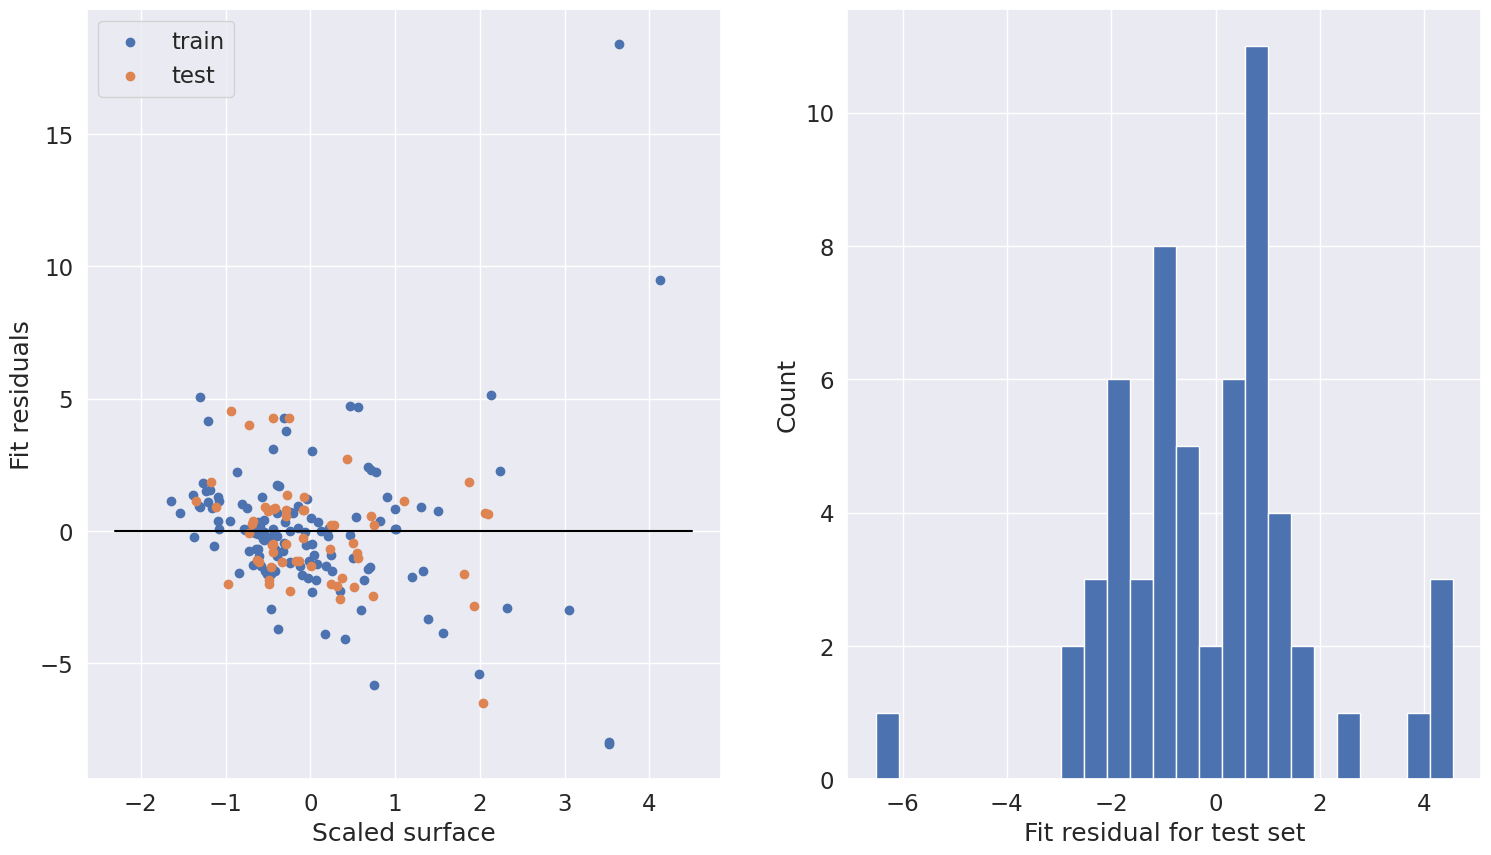

mean residuals: -0.13 
std: 1.91


In [ ]:
plotResidue(lr,X,y,rs=rs)

Ridge Regression

Note:R2 for Cross validation can not be computed because leaveOneOut function is used. R2 is the computation of standard deviation, when you have just one data point for validation, statistical paramenters cannot be computed. MSE can be computed.

In [ ]:
alphas = np.logspace(-3,3,100)
pg = {"alpha":alphas}
ridge = Ridge()
ridg_cv = gridSearchReport(ridge,X,y,pg,rs=rs)

Best parameters: {'alpha': 3.2745491628777286}
Best CV score: 10.418582708831593
MSE, R2 train: 7.901472037695784 ,  0.8049536453245207
MSE,R2 test: 3.447944639011369 , 0.8241663523605838
Elapsed time: 55.69 s, 0.93 min


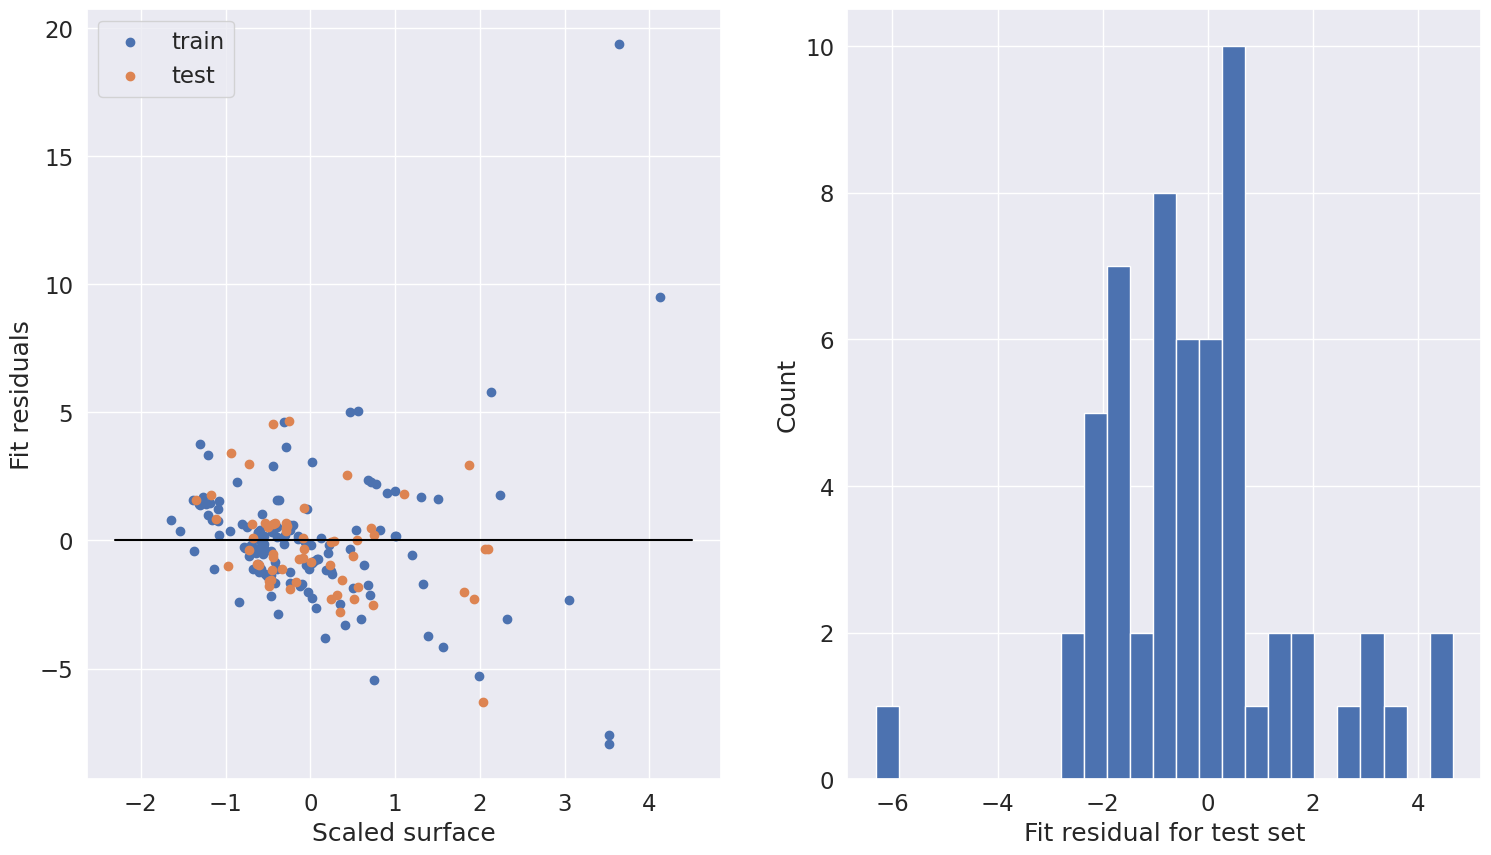

mean residuals: -0.2 
std: 1.85


In [ ]:
plotResidue(ridg_cv,X,y,rs)

Lasso Regression

In [ ]:
lasso = Lasso()
pg = {"alpha": alphas}
lasso_cv = gridSearchReport(lasso,X,y,pg,rs=rs)

Best parameters: {'alpha': 0.06579332246575682}
Best CV score: 10.407777867173529
MSE, R2 train: 8.027277301609049 ,  0.8018481659900112
MSE,R2 test: 3.6461669435363224 , 0.8140576776290465
Elapsed time: 51.33 s, 0.86 min


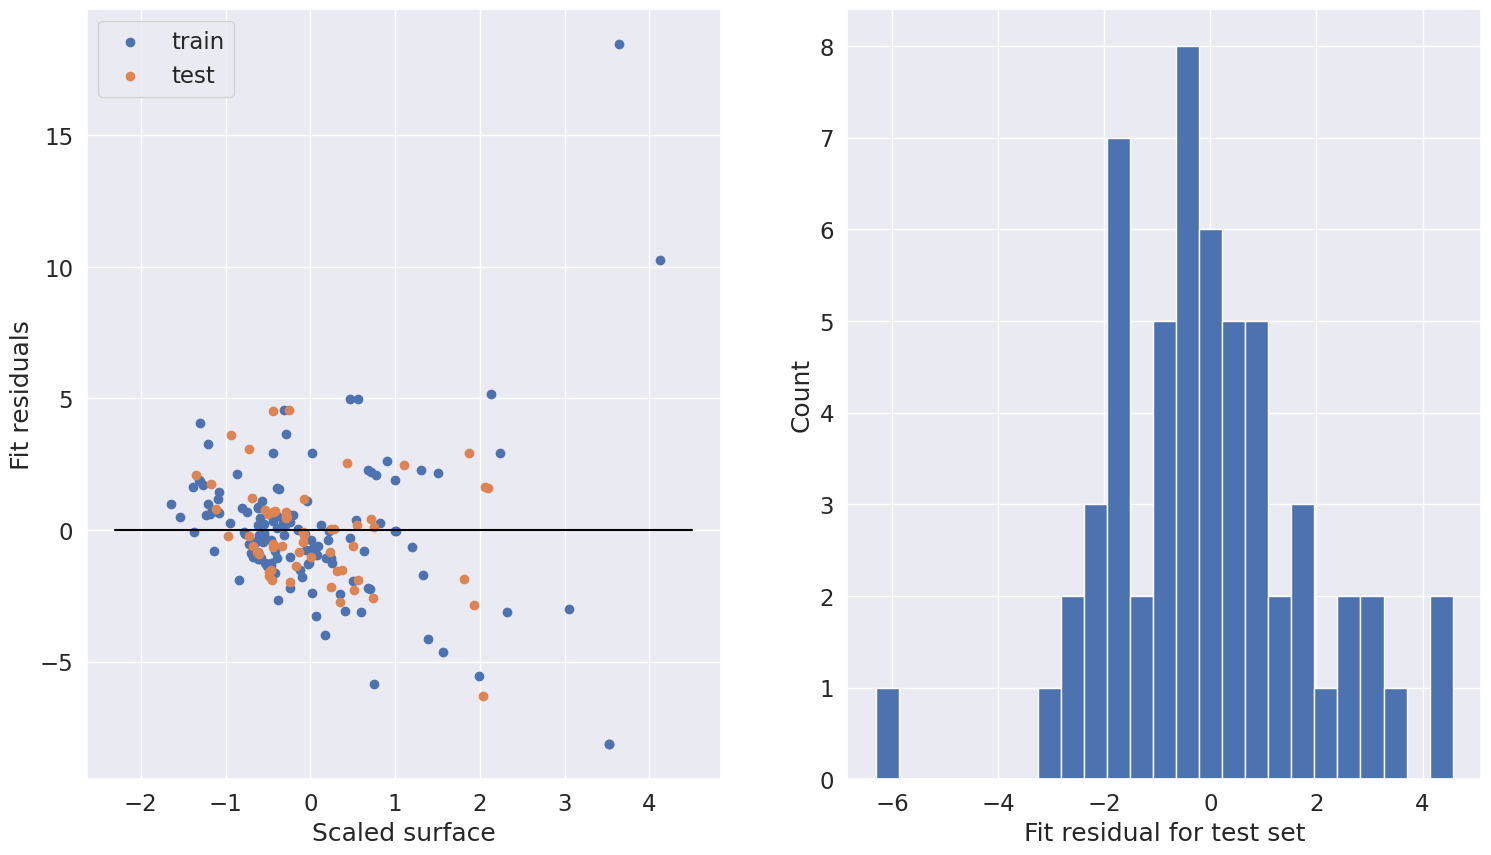

mean residuals: -0.08 
std: 1.91


In [ ]:
plotResidue(lasso_cv,X,y,rs)

Lasso and Ridge Combination

when l1_ration= 0: ridge
                1:both(lasso and ridge)

In [ ]:
l1_ratio = np.random.rand(20)
elastic = ElasticNet()
pg = {"alpha":np.linspace(0.1,1,5), "l1_ratio":l1_ratio}
elastic_cv = gridSearchReport(elastic,X,y,pg,rs=rs)

Best parameters: {'alpha': 0.1, 'l1_ratio': 0.9749341245330485}
Best CV score: 10.519345680264877
MSE, R2 train: 8.208151408042506 ,  0.79738332261061
MSE,R2 test: 3.6560723302060474 , 0.8135525360296976
Elapsed time: 49.88 s, 0.83 min


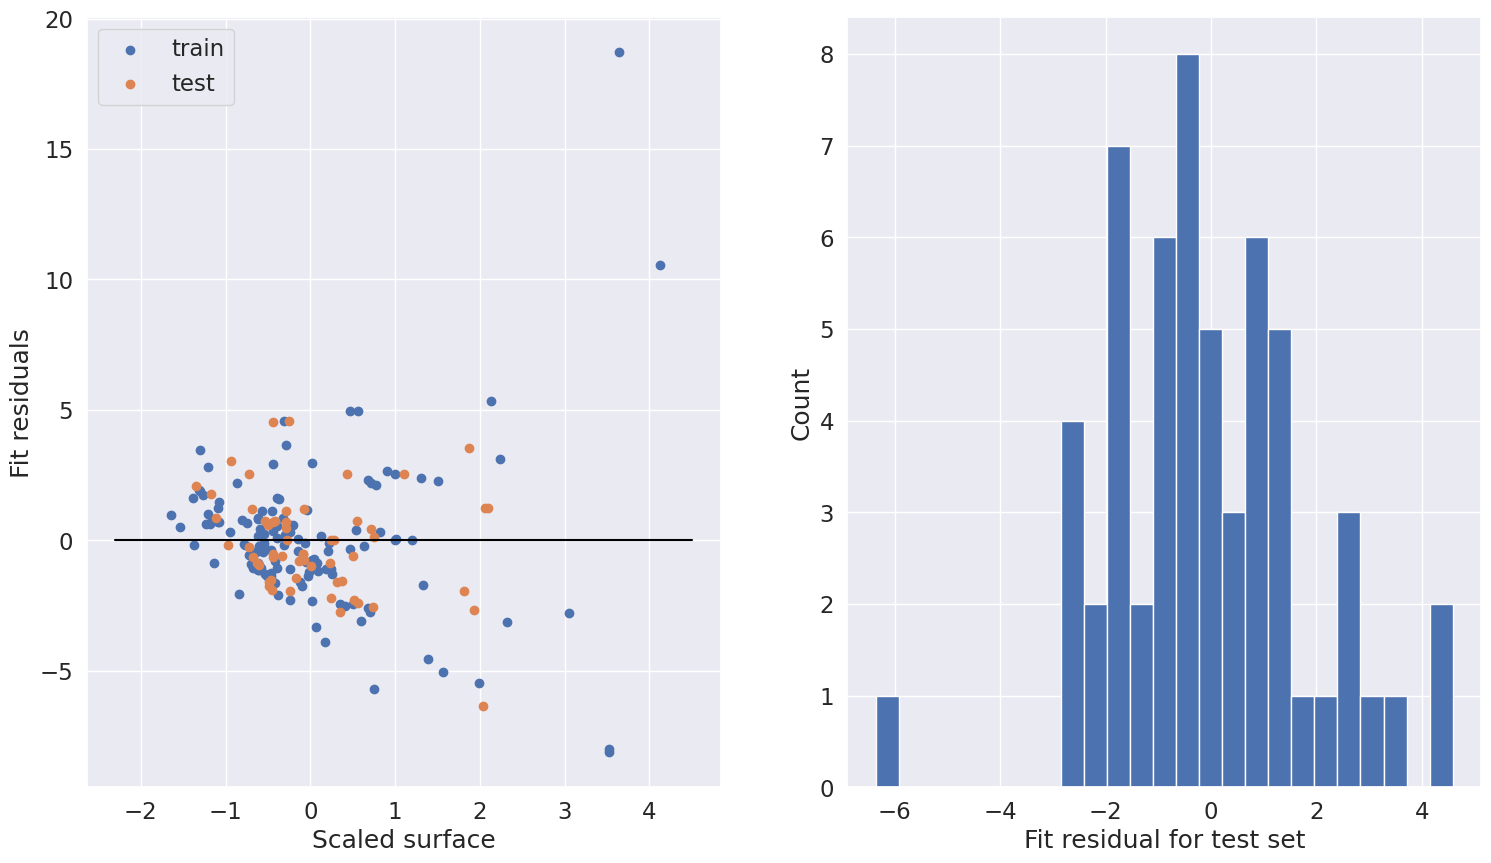

mean residuals: -0.12 
std: 1.91


In [ ]:
plotResidue(elastic_cv,X,y,rs)

Random Forest Regressor

In [ ]:
rfr= RandomForestRegressor(random_state=10)
pg = {"n_estimators":[10,20,30,50],
      "criterion":["squares_error","absolute_error","poisson"],
      "max_depth":[2,3,4],                 #maximum depth of the desicion tree
      "min_samples_split":range(2,10),      # minimum number of data points needed in a node to split
      "min_samples_leaf":[2,3],             # no. of data points on the final leaf
      "max_features": range(4,X_train.shape[1]+1) #
      }
rfr_cv = gridSearchReport(rfr,X,y,pg,cv=5,rs=rs)

Best parameters: {'criterion': 'poisson', 'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 10}
Best CV score: 11.863432181731003
MSE, R2 train: 6.185575637065327 ,  0.8473102260156985
MSE,R2 test: 4.675573337403379 , 0.7615613935852048
Elapsed time: 507.99 s, 8.47 min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4800 fits failed out of a total of 14400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2375 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklear

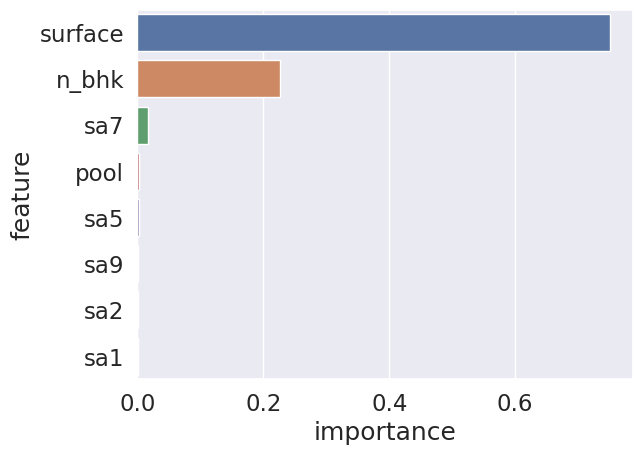

In [ ]:
rfr=rfr_cv.best_estimator_
df_imp = pd.DataFrame(zip(rfr.feature_names_in_,rfr.feature_importances_))
df_imp.columns = ["feature","importance"]
df_imp = df_imp.sort_values("importance", ascending = False).reset_index(drop=True)

sns.barplot(data =df_imp, x= "importance", y="feature")
plt.show()

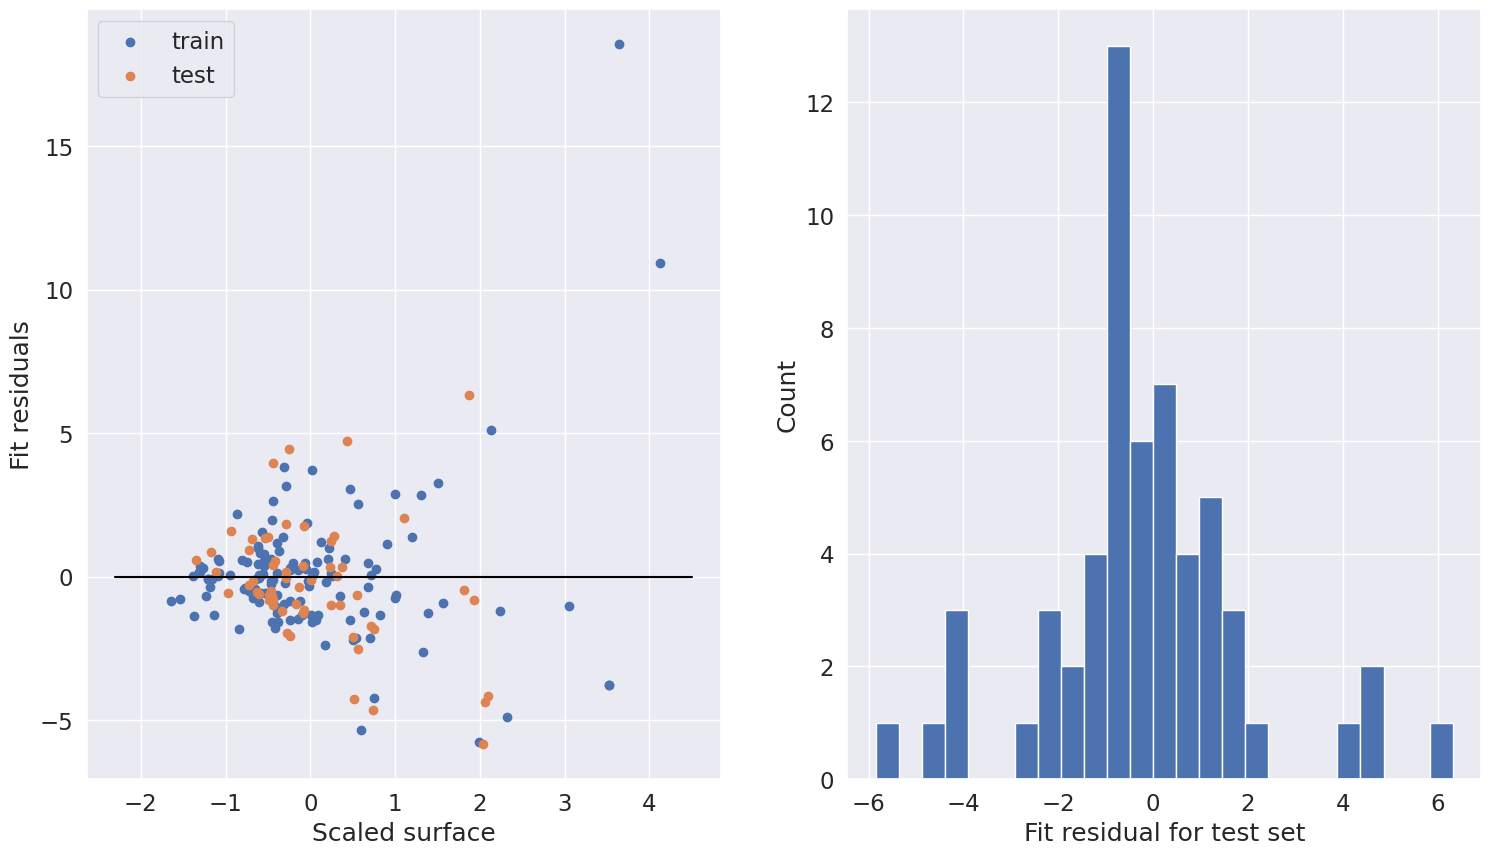

mean residuals: -0.22 
std: 2.15


In [ ]:
plotResidue(rfr_cv,X,y,rs=rs)

XGboost (extreme gradient boosting)

In [ ]:
from scipy.stats import uniform
param_grid = {'max_depth': range(2,7),
              'gamma': uniform(loc=0.0, scale=3), #minimum of the loss function reduction to split a node
              'min_child_weight': range(3,6), #similar to min_samples_leaf
              'colsample_bytree': uniform(loc=0.1, scale = 0.9),#similar to the max_features
              'subsample': uniform(loc=0.5, scale=0.5), # similar to bootstraping in RF
              'learning_rate': uniform(loc=0.01, scale=0.99)} # contribution rate of each estimator

In [ ]:
from sklearn.model_selection import ParameterSampler
rng = np.random.RandomState(20)
n_iter=500
param_list = list(ParameterSampler(param_grid, n_iter = n_iter, random_state=rng))

In [ ]:
param_list[0]

{'colsample_bytree': 0.6293177209695467,
 'gamma': 2.6931411837282537,
 'learning_rate': 0.8926154221799609,
 'max_depth': 3,
 'min_child_weight': 3,
 'subsample': 0.5179447928084266}

In [ ]:
from sklearn.model_selection import KFold

def cross_validate(est,Xn,yn,n_fold=10):

  """
  Cross Validation for XGB fit.
  Params:
      est: s
      Xn:numpy array(n_sample,n_feature)
         Training feature matrix
      yn:numpy array(n_sample,)
         Training target vector
      n_fold: int
        number of folds for cross validating
  """
  kf = KFold(n_splits = n_fold, shuffle = True, random_state=0)
  mean_train_score, mean_val_score = 0., 0.
  for train_index, val_index in kf.split(Xn,yn):
      est.fit(Xn[train_index], yn[train_index],
                  eval_set=[(Xn[train_index],yn[train_index]),
                            (Xn[val_index], yn[val_index])],
                  eval_metric = 'rmse',
                  verbose = False, # to not print the training log data
                  early_stopping_rounds=30)
      mean_val_score += mean_squared_error(yn[val_index],est.predict(Xn[val_index]))
      mean_train_score += mean_squared_error(yn[train_index], est.predict(Xn[train_index]))

  return mean_train_score/n_fold, mean_val_score/n_fold

In [ ]:
xgbr = xgb.XGBRegressor( objective='reg:squarederror', n_estimators=1000, verbosity=1 ) # XGBoost model

val_score, train_score = [], []
counter = 0
for param_grid in param_list:
    xgbr.set_params(**param_grid)
    train_error, val_error = cross_validate(xgbr, X_train.values, y_train.values)
    val_score.append(val_error)
    train_score.append(train_error)

    if counter%50 == 0 :
        print("iter =", counter,
              "train_score=", train_score[counter], ", ",
              "val_score=", val_score[counter])
    counter += 1


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

iter = 0 train_score= 8.262955686603517 ,  val_score= 10.371649182518528


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

iter = 50 train_score= 8.180397187805498 ,  val_score= 10.397047874570518


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

iter = 100 train_score= 6.910212424193577 ,  val_score= 11.415062266815676


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

iter = 150 train_score= 8.457058871812942 ,  val_score= 12.918407110500144


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

iter = 200 train_score= 9.895878561773628 ,  val_score= 12.297891631754624


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

iter = 250 train_score= 6.69021893826019 ,  val_score= 11.344958420909585


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

iter = 300 train_score= 8.08588595196153 ,  val_score= 11.988304707005167


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

iter = 350 train_score= 10.3172076279996 ,  val_score= 12.439028434808984


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

iter = 400 train_score= 10.523706853415332 ,  val_score= 12.825164405636349


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

iter = 450 train_score= 8.280910463577126 ,  val_score= 12.787236734219798


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

In [ ]:
df_grid = pd.DataFrame(param_list)
df_grid["train_score"] = train_score
df_grid["val_score"]= val_score
df_grid

colsample_bytree     gamma  learning_rate  max_depth  min_child_weight  \
0            0.629318  2.693141       0.892615          3                 3   
1            0.722582  1.136043       0.523326          4                 5   
2            0.345085  2.155818       0.785174          3                 4   
3            0.132998  0.350081       0.753768          4                 4   
4            0.871863  2.849337       0.566070          2                 5   
5            0.502609  0.758922       0.875455          2                 3   
6            0.685707  0.806386       0.076651          2                 5   
7            0.337266  0.931535       0.630585          3                 3   
8            0.455359  0.773924       0.586419          4                 5   
9            0.341321  0.409665       0.378235          4                 5   
10           0.967258  0.587563       0.968198          2                 3   
11           0.562212  1.503774       0.046713          6                 3   
12           0.401802  2.102857       0.637614          4                 4   
13           0.424505  2.473570       0.057453          5                 5   
14           0.574604  1.977951       0.275608          4                 4   
15           0.725951  0.897816       0.173979          3                 4   
16           0.923174  0.852075       0.116531          2                 3   
17           0.855005  0.106611       0.130229          4                 4   
18           0.931977  1.743728       0.775524          6                 4   
19           0.672309  2.938271       0.692985          6                 4   
20           0.404343  1.175087       0.803359          6                 3   
21           0.608788  0.242448       0.470560          4                 3   
22           0.821816  2.916333       0.861578          4                 4   
23           0.788733  2.917510       0.916788          6                 3   
24           0.496968  2.081974       0.729375          4                 5   
25           0.555610  1.930608       0.261639          2                 3   
26           0.741901  0.539752       0.870765          4                 5   
27           0.305593  2.739044       0.838106          6                 5   
28           0.550913  0.393526       0.385030          5                 3   
29           0.541407  0.385210       0.508793          4                 3   
30           0.656259  2.685043       0.670827          6                 3   
31           0.572041  0.128245       0.846018          2                 4   
32           0.475683  1.916589       0.692632          6                 4   
33           0.956183  1.598374       0.320426          2                 5   
34           0.521055  2.108788       0.163058          5                 5   
35           0.762786  2.720068       0.795383          6                 5   
36           0.814908  2.513915       0.546507          6                 3   
37           0.516949  2.339761       0.845058          2                 3   
38           0.144405  1.475473       0.106878          2                 5   
39           0.158151  0.785286       0.027130          3                 4   
40           0.709012  0.064799       0.395593          5                 3   
41           0.428388  0.544065       0.724672          4                 3   
42           0.884268  1.082613       0.643070          3                 5   
43           0.856135  1.833625       0.582867          5                 4   
44           0.519905  2.629992       0.444126          5                 5   
45           0.166381  2.407222       0.055634          2                 3   
46           0.827152  1.442039       0.460963          4                 4   
47           0.659233  1.083238       0.959365          3                 5   
48           0.826689  1.898802       0.187530          5                 5   
49           0.901161  2.193103       0.464159         

In [ ]:
df_grid_best = df_grid[df_grid["val_score"]==min(val_score)]
df_grid_best

colsample_bytree     gamma  learning_rate  max_depth  min_child_weight  \
147          0.875255  2.286077       0.880219          5                 3   

     subsample  train_score  val_score  
147   0.549428    11.946719   8.697185

In [ ]:
best_params= df_grid_best.iloc[0,:-2].to_dict()
best_params

{'colsample_bytree': 0.875254568098959,
 'gamma': 2.286076578796976,
 'learning_rate': 0.8802185365665449,
 'max_depth': 5.0,
 'min_child_weight': 3.0,
 'subsample': 0.5494275129483495}

In [ ]:
best_params["max_depth"] = int(best_params["max_depth"])

In [ ]:
xgbr.set_params(**best_params)
xgbr.fit(X_train,y_train,
                eval_set=[(X_train,y_train),(X_test,y_test)],
                eval_metric='rmse',
                verbose= True,
                early_stopping_rounds= 30)

[0]	validation_0-rmse:4.54714	validation_1-rmse:2.83274
[1]	validation_0-rmse:3.42718	validation_1-rmse:3.03684
[2]	validation_0-rmse:3.22411	validation_1-rmse:3.33034
[3]	validation_0-rmse:2.99863	validation_1-rmse:2.72313
[4]	validation_0-rmse:3.07581	validation_1-rmse:3.31613
[5]	validation_0-rmse:2.97292	validation_1-rmse:3.33907
[6]	validation_0-rmse:2.97435	validation_1-rmse:3.16754
[7]	validation_0-rmse:2.94873	validation_1-rmse:3.75693
[8]	validation_0-rmse:2.70622	validation_1-rmse:3.18000
[9]	validation_0-rmse:2.61978	validation_1-rmse:3.05585
[10]	validation_0-rmse:2.33524	validation_1-rmse:3.38323
[11]	validation_0-rmse:2.28094	validation_1-rmse:3.50682
[12]	validation_0-rmse:2.28637	validation_1-rmse:3.63330
[13]	validation_0-rmse:2.33907	validation_1-rmse:3.56796
[14]	validation_0-rmse:2.26707	validation_1-rmse:4.02415
[15]	validation_0-rmse:2.13408	validation_1-rmse:3.67870
[16]	validation_0-rmse:2.13571	validation_1-rmse:3.78737
[17]	validation_0-rmse:2.01588	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.77642	validation_1-rmse:4.81864
[32]	validation_0-rmse:1.71603	validation_1-rmse:4.73836
[33]	validation_0-rmse:1.71609	validation_1-rmse:4.62378


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.875254568098959, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2.286076578796976, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.8802185365665449, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3.0, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgbr.get_booster().attributes()

{'best_iteration': '3',
 'best_ntree_limit': '4',
 'best_score': '2.7231337649061476'}

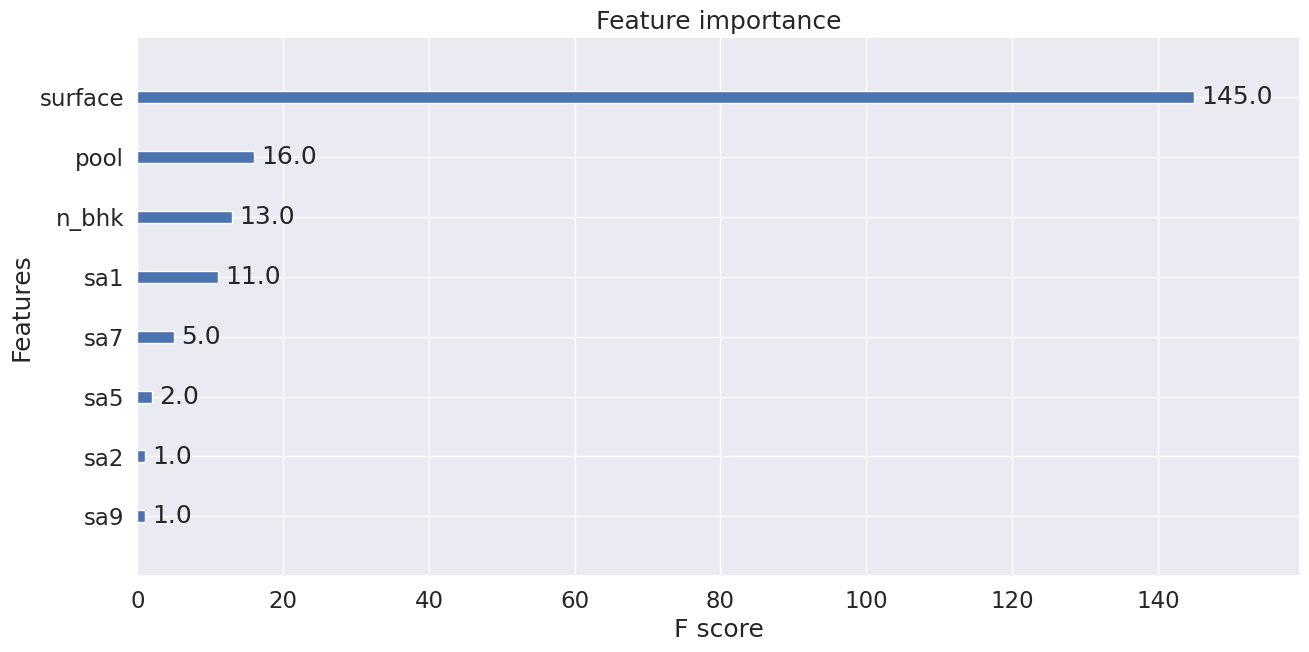

In [ ]:
plt.rcParams["figure.figsize"]=(15,7)
xgb.plot_importance(xgbr)
plt.show()

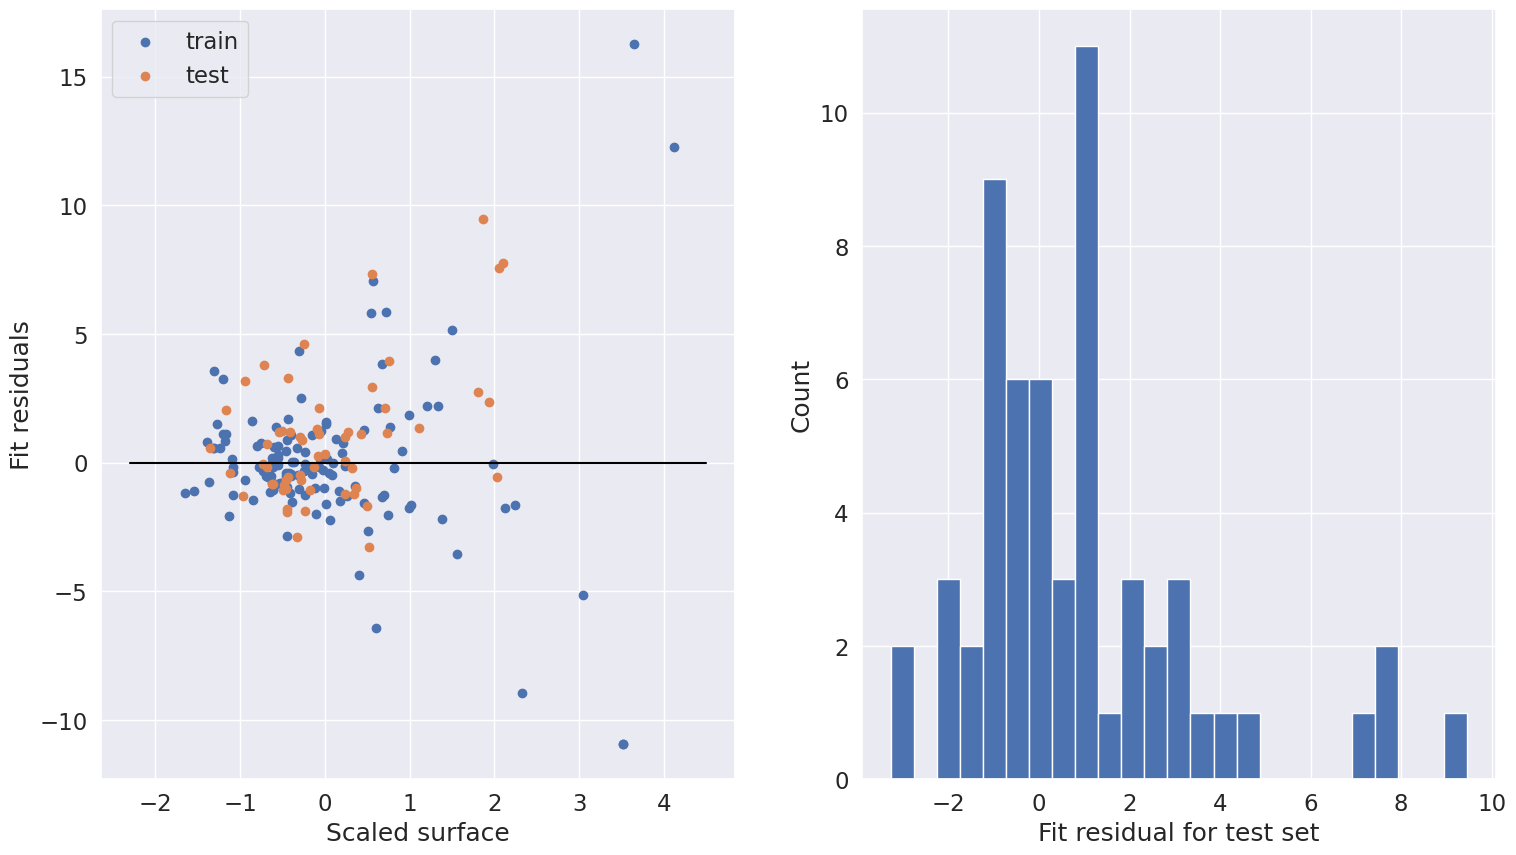

mean residuals: 0.92 
std: 2.56


In [ ]:
plotResidue(xgbr,X,y,rs=rs)

K-Nearest Neighbours Regression

In [ ]:
%time
knn = KNeighborsRegressor()
pg = {
    "n_neighbors": range(1,16),
    "weights": ['uniform','distance'],
    "algorithm":['auto','ball_tree','kd_tree','brute']
}
knn_cv = gridSearchReport(knn,X,y,pg, rs=rs)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs
Best parameters: {'algorithm': 'brute', 'n_neighbors': 6, 'weights': 'distance'}
Best CV score: 11.928094956024498
MSE, R2 train: 0.0039271729323308285 ,  0.9999030584730317
MSE,R2 test: 3.7169297208517973 , 0.8104490125966394
Elapsed time: 74.16 s, 1.24 min


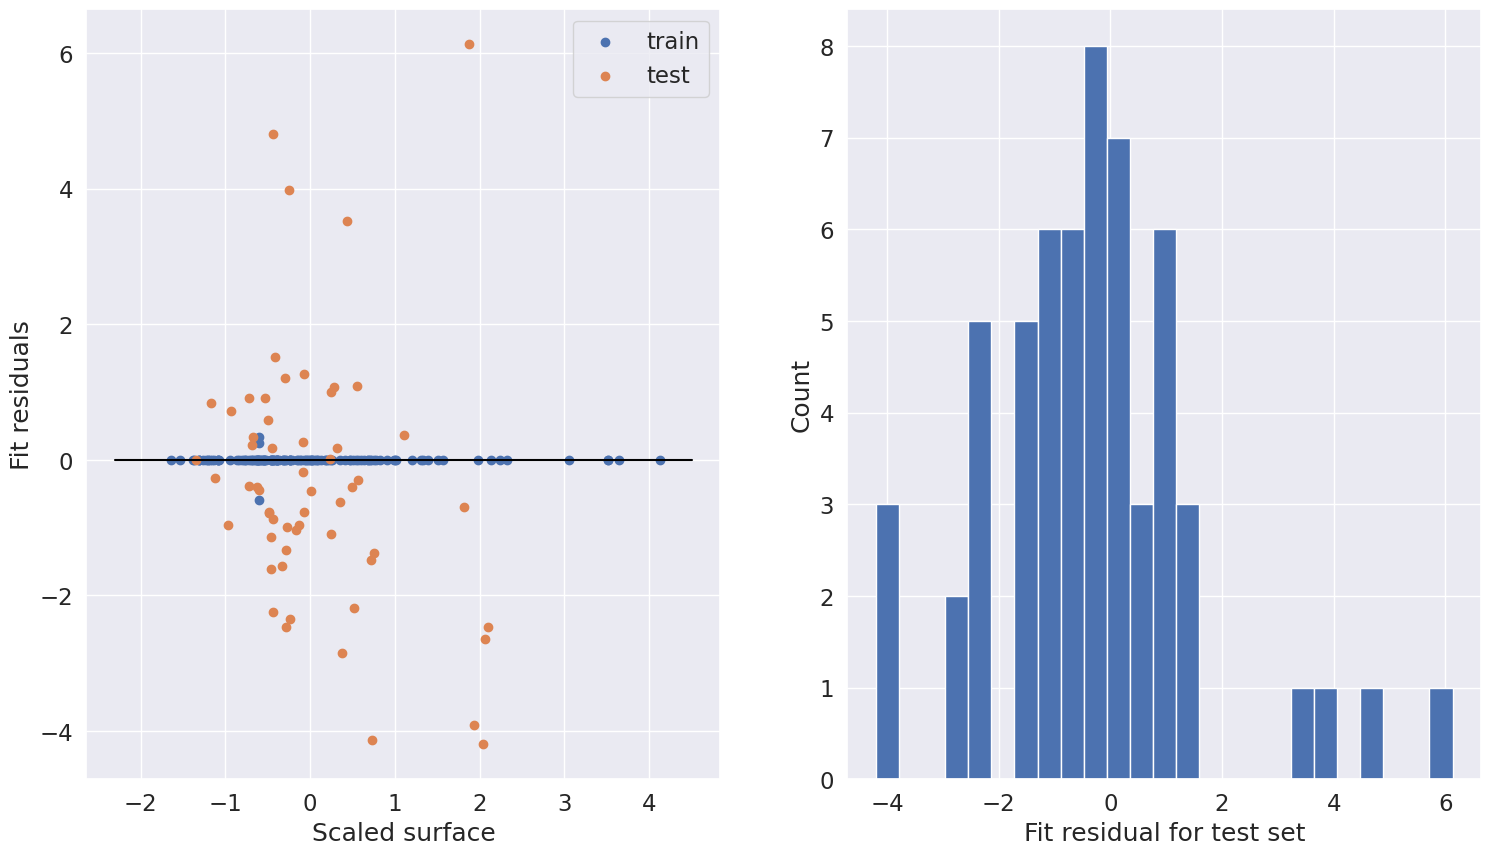

mean residuals: -0.33 
std: 1.9


In [ ]:
plotResidue(knn_cv,X,y,rs=rs)

In [ ]:
from sklearn.model_selection import validation_curve
param_range= range(1,31)
knn_cv = KNeighborsRegressor()
train_scores, val_scores= validation_curve(knn_cv,
                                           X_train,y_train,
                                           param_name="n_neighbors",
                                           param_range=param_range,
                                           n_jobs=-1,
                                           scoring="neg_mean_squared_error",
                                           cv=10
                                           )

In [ ]:
train_scores.shape

(30, 10)

In [ ]:
train_mean_score = -np.mean(train_scores,axis=1)
val_mean_score = -np.mean(val_scores,axis=1)

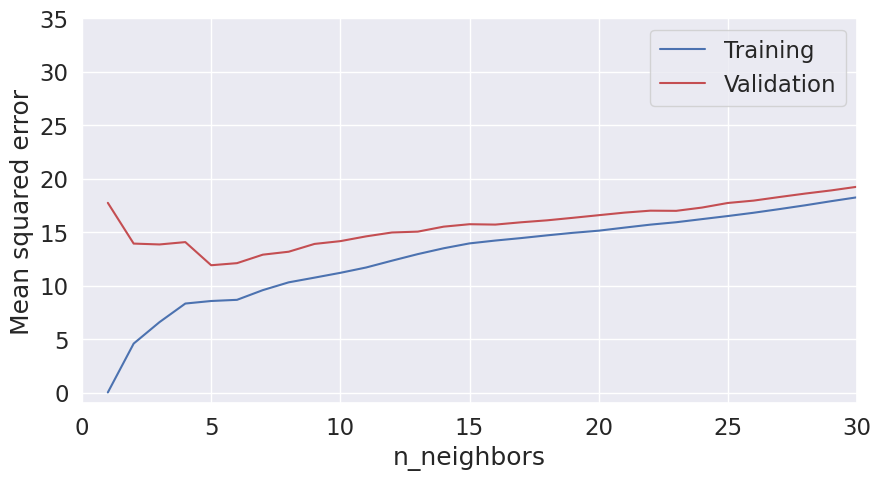

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
plt.plot(param_range, train_mean_score,color="b",label="Training")
plt.plot(param_range, val_mean_score,color="r",label="Validation")
plt.xlim(1,15)
plt.xlabel("n_neighbors")
plt.ylim(-1,35)
plt.xlim(0,30)
plt.ylabel("Mean squared error")
plt.legend()
plt.show()

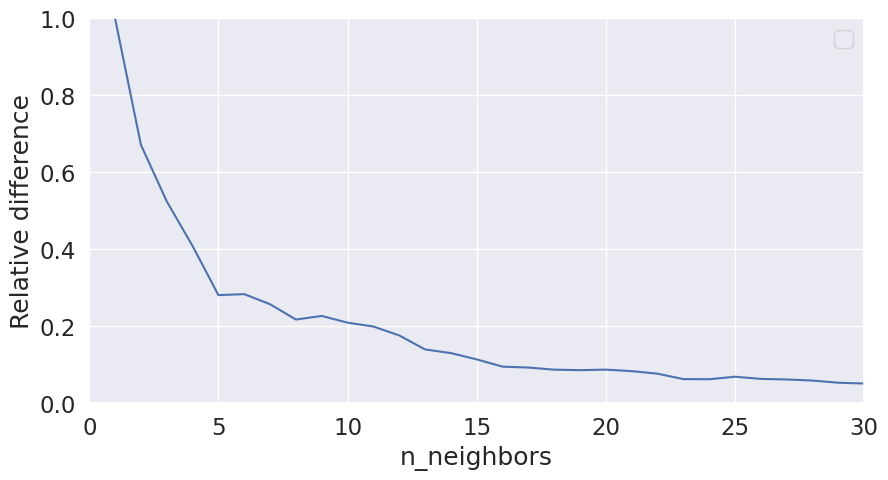

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
plt.plot(param_range,(val_mean_score-train_mean_score)/val_mean_score)
plt.xlim(1,15)
plt.xlabel("n_neighbors")
plt.ylim(0,1)
plt.xlim(0,30)
plt.ylabel("Relative difference")
plt.legend()
plt.show()

In [ ]:
knn_cv = KNeighborsRegressor(n_neighbors=20,weights="uniform")
knn_cv.fit(X_train,y_train)
y_pred_knn= knn_cv.predict(X_test)
print(r2_score(y_train,knn_cv.predict(X_train)), r2_score(y_test,y_pred_knn))
mean_squared_error(y_train,knn_cv.predict(X_train)), mean_squared_error(y_test,y_pred_knn)

0.6343518352143672 0.7857380273019865


(14.812677501691729, 4.201490613577586)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_list = cross_val_score(knn_cv,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
score_val_knn = -np.mean(cross_val_list)
score_val_knn

16.583940282232142

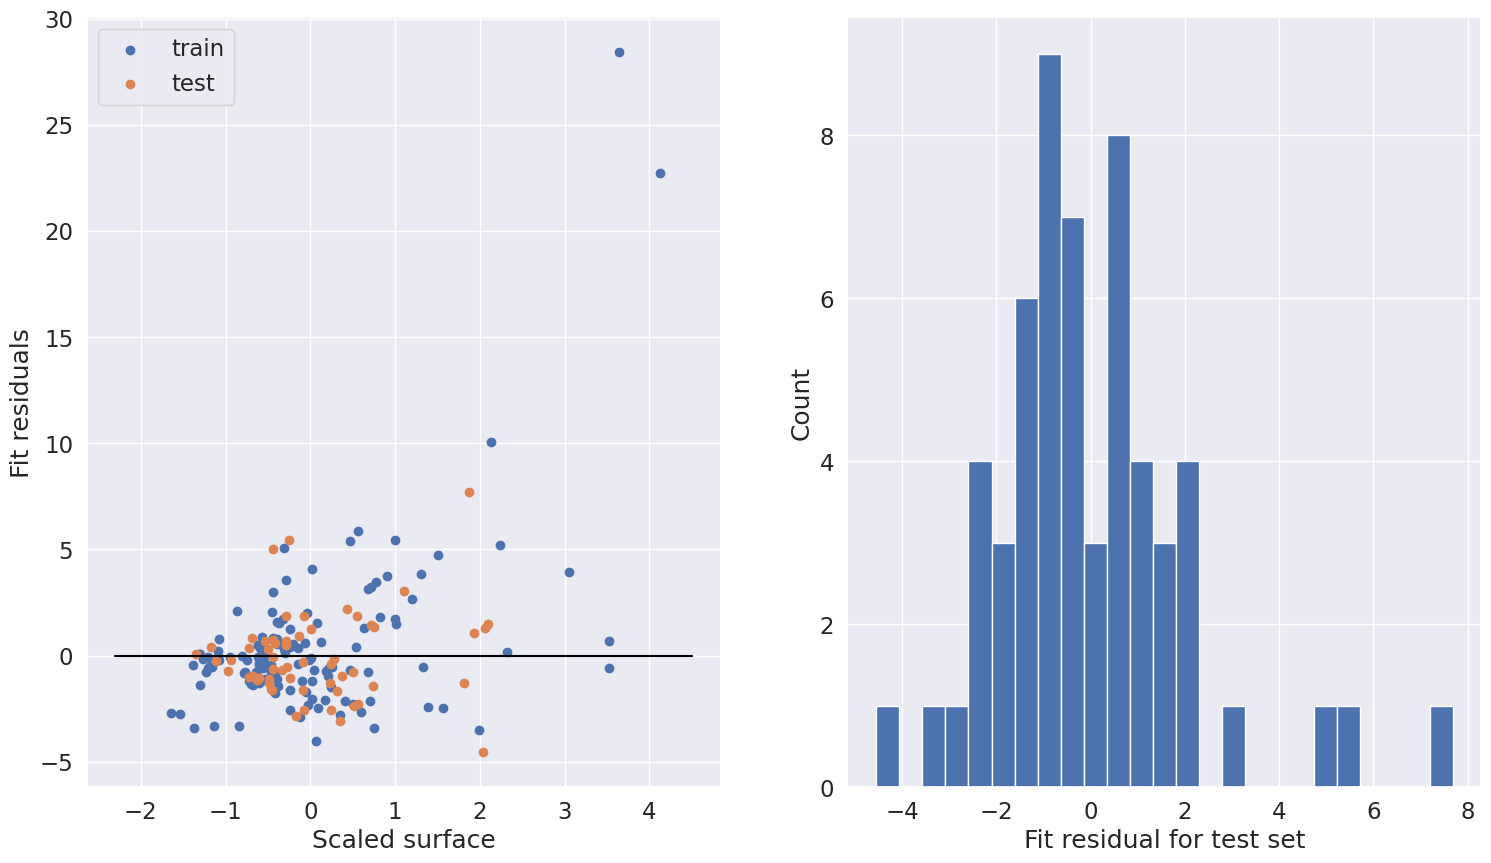

mean residuals: -0.02 
std: 2.05


In [ ]:
plotResidue(knn_cv,X,y,rs=rs)

Support Vector Regressor

In [ ]:
svr = SVR()
pg = {
    "kernel": ['linear','poly','rbf','sigmoid'],
    "gamma": ['scale','auto',], #Kernel coefficient
    "C":np.logspace(-3,3,10),#Penalty parameter, large C= strength of regularization is small and vice verca. represents L2 pentalty here
    "epsilon": np.linspace(.1,1.,10)# the decision boundary
}
svr_cv = gridSearchReport(svr,X,y,pg,cv=10,rs=rs)

Best parameters: {'C': 2.154434690031882, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}
Best CV score: 9.356070885265115
MSE, R2 train: 9.067544243899928 ,  0.7761693717077229
MSE,R2 test: 3.2248964453597293 , 0.8355410644268413
Elapsed time: 148.9 s, 2.48 min


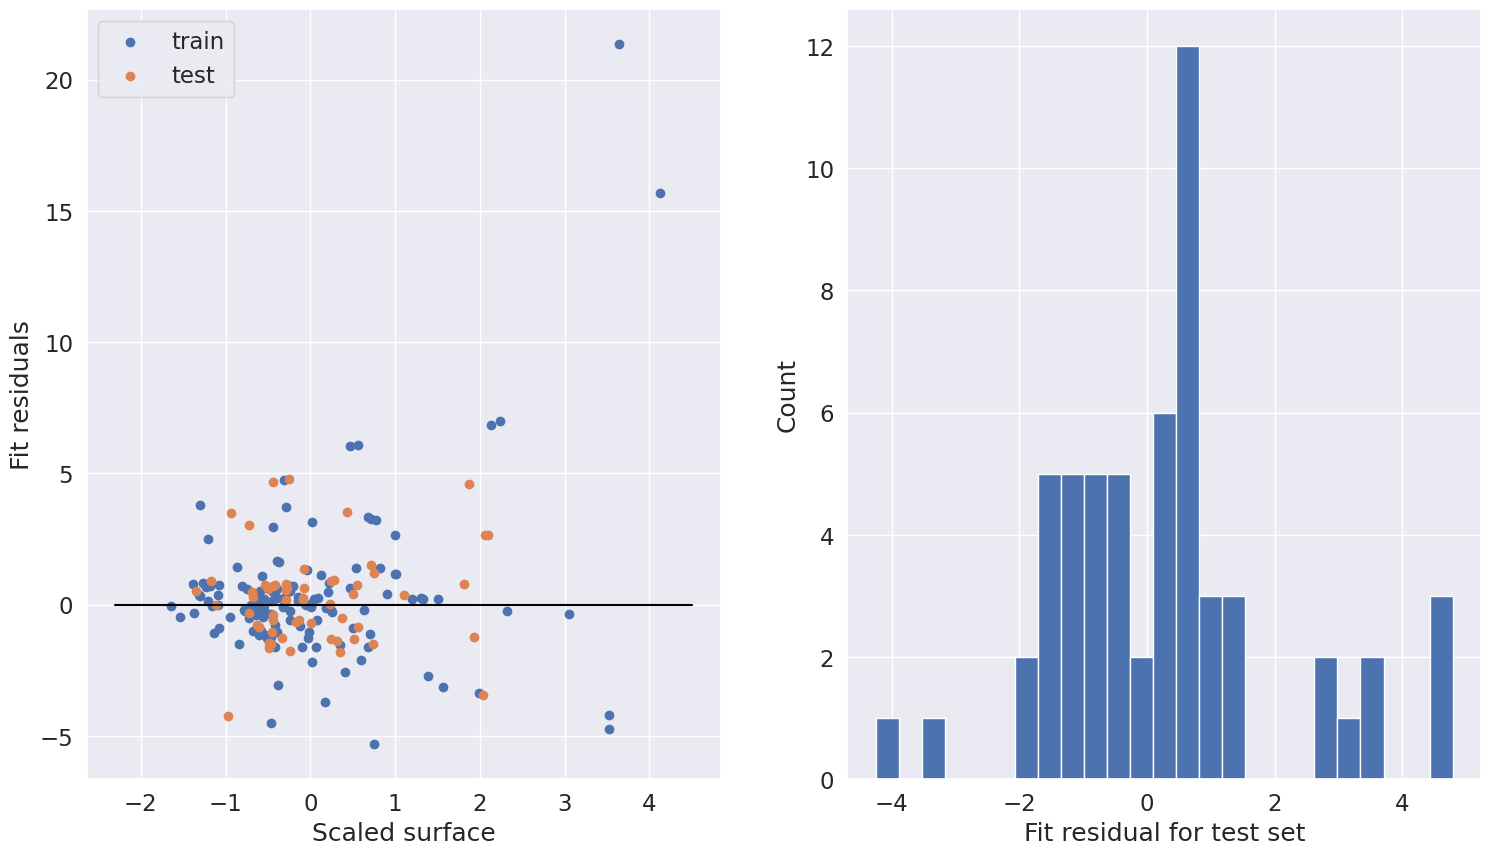

mean residuals: 0.26 
std: 1.78


In [ ]:
plotResidue(svr_cv,X,y,rs=rs)

Comparing the estimators

In [ ]:
def sortXy(X,y):
    """
    Prepares the features to have the fit only for "surface" variable.
    """
    df = X.copy()
    df["price"]=y
    df = df.sort_values("surface").reset_index(drop=True)
    return df.drop(columns=["price"]), df["price"]

  ###########################################################

def get_scores(X,y,est_name,est):
  """
    Computes the validation and test scores.
    Params:
      X:Pandas dataframe,feature data
      y:Pandas series, target
      est_name:str
        estromator name
      est:regressor
        the regression estimator
    Return:
      r2 for the test sample, mse for validation sample and the label gor plotting.
  """
  y_pred = est.predict(X)
  r2_test= round(r2_score(y,y_pred),1)
  if est_name=="Linear Regression":
    mse_cv= "--"
  elif est_name=="Extreme Gradient Boosting":
    mse_cv= round(df_grid_best["val_score"].to_list()[0],1)
  elif est_name=="K-Nearest Neighbors Regression":
    mse_cv= round(score_val_knn,1)
  else:
    mse_cv= round(abs(est.best_score_),1)

  lbl = est_name+": R2_test="+str(r2_test)+",MSE_cv="+ str(mse_cv)

  return r2_test,mse_cv, lbl

###############################################
def plotLines(X,y,estimators,rs):
    """
    plots the fitted curve for the given estimators to test data vs."surface" variable.
    Params:
      X:Pandas dataframe
        features
      y:Pandas series
        target
      estimators:list
        list of regressors
      rs:int
        random state
    """
    X,y = sortXy(X,y)
    colors = ["k","b","r","g"]
    fig,axe = plt.subplots(figsize=(20,10))
    axe.scatter(X["surface"],y)
    i=0
    for k, estimator in estimators.items():
      r2_test,mse_cv,label = get_scores(X,y,k,estimator)
      axe.plot(X["surface"], estimator.predict(X), label= label,c=colors[i])
      i+=1
    axe.set_xlabel("Scaled surface")
    axe.set_ylabel("Price in millions")
    axe.legend()





In [ ]:
estimators1 = {
              "Linear Regression":lr,
              "Ridge Regression": ridg_cv,
              "Lasso Regression": lasso_cv,
              "Elastic Net": elastic_cv,
}

estimators2 = {
    "Random Forest Regression": rfr_cv,
    "Extreme Gradient Boosting": xgbr,
    "K-Nearest Neighbors Regression": knn_cv,
    "Support Vector Regression": svr_cv

}

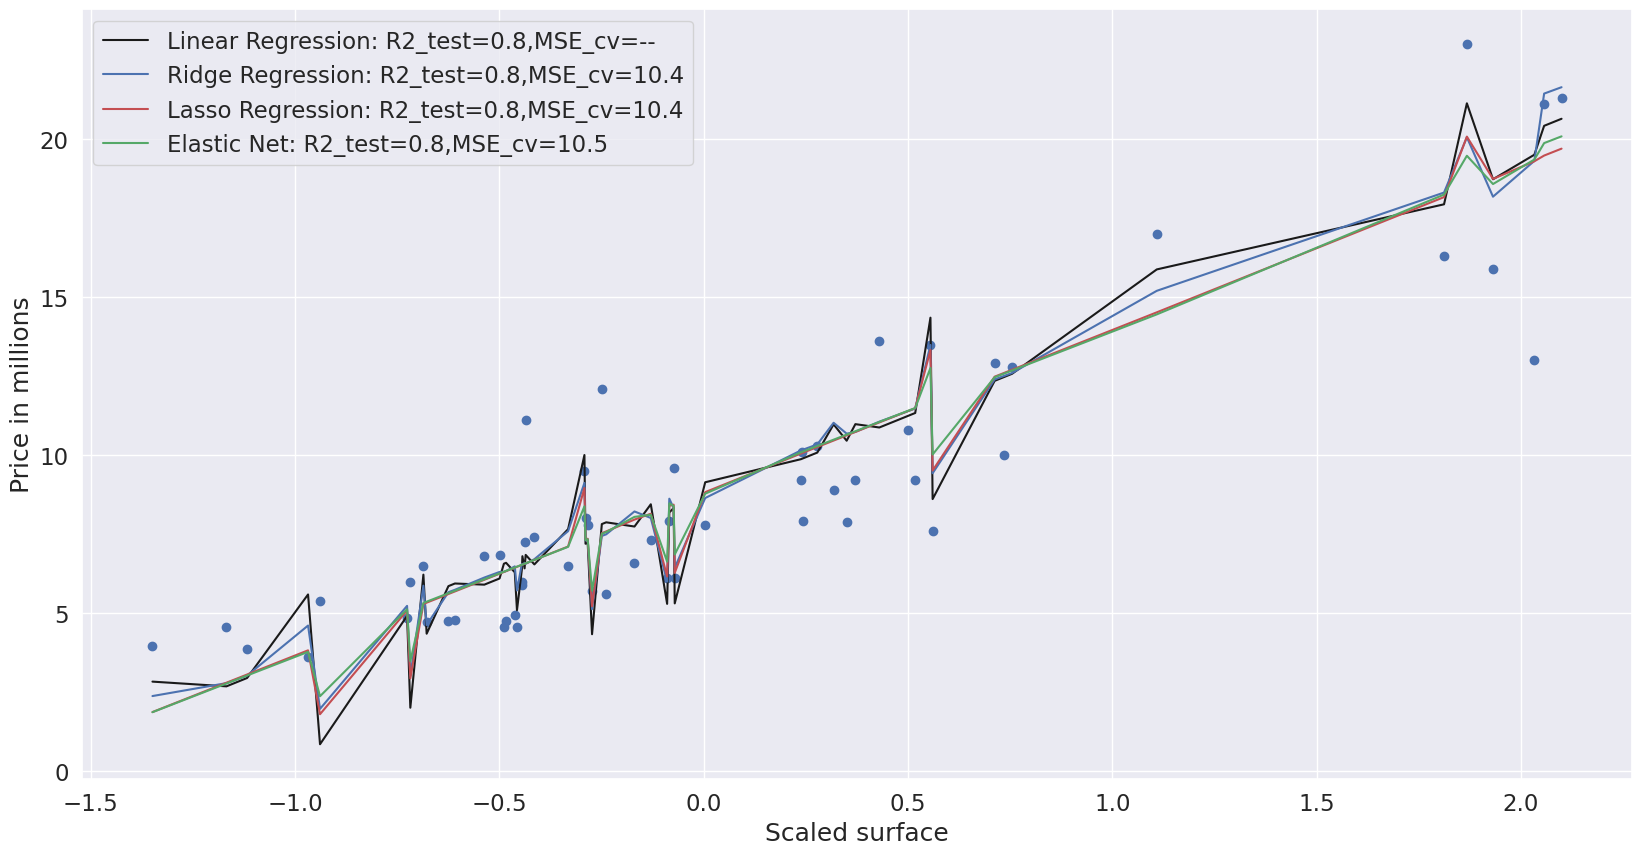

In [ ]:
plotLines(X_test,y_test,estimators1,rs=rs)


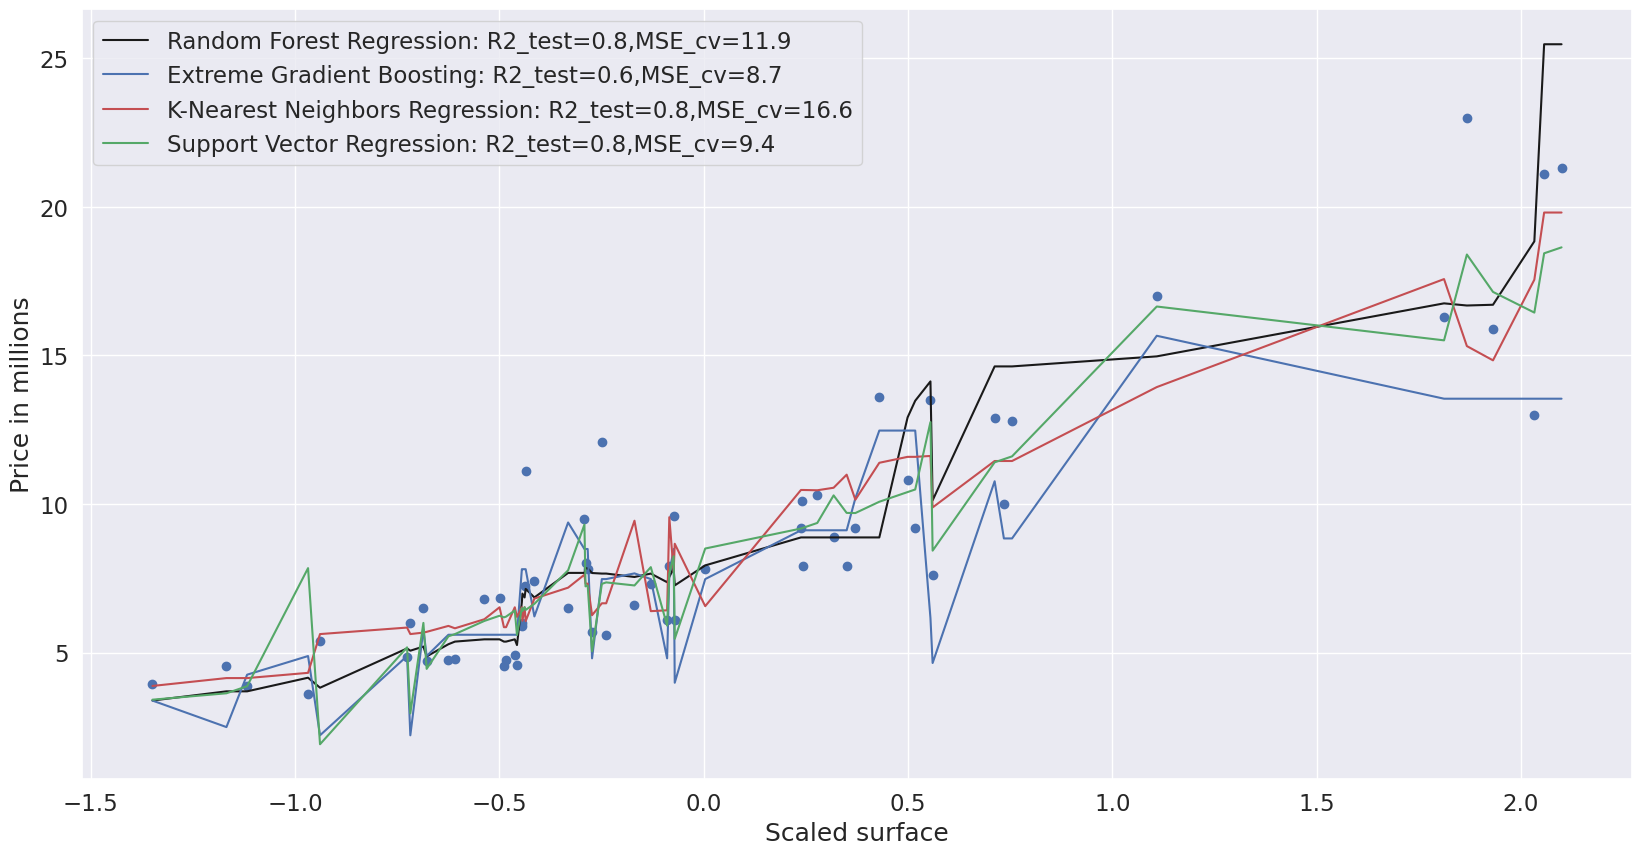

In [ ]:
plotLines(X_test,y_test,estimators2,rs=rs)

In [ ]:
sns.set(font_scale=1.5)

In [ ]:
data= pd.read_csv('./resd_features.csv')

In [ ]:
data.head()#returns the first five rows of the DataFrame or Series

surface  n_bhk  sa1  pool  sa9  sa7  sa2  sa5  price
0 -1.082437    1.0    0     1    0    0    1    0    3.9
1 -0.331565    2.0    0     1    0    0    1    0    6.5
2 -0.025358    3.0    0     1    0    0    1    0    7.4
3  0.318126    3.0    0     1    0    0    1    0    8.9
4 -0.414108    2.0    0     1    0    0    0    0    7.4

In [ ]:
#Features -target separation
X= data.iloc[:,:-1] #features
y=data["price"]

MLPRegression with scikiit-learn

In [ ]:
def gridSearchReport(estimator,X,y,pg,cv=5,rs=118):
  """
  Performs the grid search and cross validation for the given regressor.
  Params:
    estimator: the regressor
    X:Pandas dataframe,feature data
    y:Pandas series,target
    pg:dict, parameter's grid
    cv: int, cross-validation generator or an iterable,cross validation folds
    rs: int,training-test split random state
  Return:
    the estimator with the best hyper parameters.

*Note: the best hyperparametrs are those who give the minimum validationscore
  """
  t0= time()
  X_train,X_test,y_train,y_test=\
     train_test_split(X.values,y.values,test_size=.3, random_state=rs)
#gridsearch is performed to find the bestcombination of parameter values that optimize a performance metric using cross validation.
  est_cv= GridSearchCV(
      estimator,param_grid=pg,
      scoring="r2",
      n_jobs=-1, #all posssible computaional resources are used to do the grid search
      cv=cv
  )
  est_cv.fit(X_train,y_train)

  print("Best parameters:",est_cv.best_params)
  print("Best CV scores:",abs(est_cv.best_score_))

  y_train_pred,y_test_pred = est_cv.predict(X_train),est_cv.predict(X_test)
  print("MSE,R2 train:", mean_squared_error(y_train,y_train_pred),
        ",",r2_score(y_train,y_train_pred))
  print("MSE,R2 test", mean_squared_error(y_test,y_test_pred),
        ",", r2_score(y_test,y_test_pred))

  t= round(time()-t0,2)
  print("Elapsed time:",t,"s,", round(t/60,2),"min")

  return est_cv


In [ ]:
def plotResidue(estimator,X,y,rs=118):
  """
plots the fit residuals(price-predicted_price) vs."surface" variable.
Params:
  estimator: GridsearchCV, the regressor
  """